In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import warnings
import sys
import os

# Add src to path to import our data loader
sys.path.append('../src')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print(" Libraries imported successfully!")
print(f" Pandas version: {pd.__version__}")
print(f" NumPy version: {np.__version__}")

 Libraries imported successfully!
 Pandas version: 2.3.3
 NumPy version: 2.3.5


In [3]:
from data_loader import load_insurance_data

print(" Loading insurance data...")

# Load the data (use sample_size=10000 for testing if dataset is large)
# Remove sample_size parameter for full dataset
try:
    # Try with full dataset first
    df = load_insurance_data(
        data_path='../data/raw/MachineLearningRating_v3.txt',
        clean=True,
        convert_dtypes=True
    )
    print(f" Data loaded successfully!")
    
except Exception as e:
    print(f"  Error loading full dataset: {e}")
    print(" Trying with sample for testing...")
    # Fallback to sample
    df = load_insurance_data(
        data_path='../data/raw/insurance_data.txt',
        sample_size=10000,
        clean=True,
        convert_dtypes=True
    )
    print(f" Sample data loaded successfully!")

print(f"\n Dataset loaded:")
print(f"   • Rows: {df.shape[0]:,}")
print(f"   • Columns: {df.shape[1]:,}")
print(f"   • Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

 Loading insurance data...
📁 Loading data from: ../data/raw/MachineLearningRating_v3.txt
 Loaded full dataset: 1,000,098 rows, 52 columns

  BASIC DATA INFORMATION:
   Shape: (1000098, 52)
   Memory usage: 2373.96 MB
   Time period: 2013-10-01 00:00:00 to 2015-08-01 00:00:00
   Numeric columns: 15
   Categorical columns: 36

 Cleaning column names...
 Column names cleaned. Examples:
   UnderwrittenCoverID → underwrittencoverid
   PolicyID → policyid
   TransactionMonth → transactionmonth
   IsVATRegistered → isvatregistered
   Citizenship → citizenship

 Converting data types...
    transactionmonth converted to datetime
 Data type conversion complete
 Data loaded successfully!

 Dataset loaded:
   • Rows: 1,000,098
   • Columns: 52
   • Memory usage: 2309.1 MB


In [4]:
print("="*60)
print("INITIAL DATA INSPECTION")
print("="*60)

# Display first few rows
print("\n First 5 rows of the dataset:")
display(df.head())

# Display last few rows
print("\n Last 5 rows of the dataset:")
display(df.tail())

# Display column information
print("\n Column Information:")
print(f"Total columns: {len(df.columns)}")
print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:3d}. {col}")

INITIAL DATA INSPECTION

 First 5 rows of the dataset:


,underwrittencoverid,policyid,transactionmonth,isvatregistered,citizenship,legaltype,title,language,bank,accounttype,maritalstatus,gender,country,province,postalcode,maincrestazone,subcrestazone,itemtype,mmcode,vehicletype,registrationyear,make,model,cylinders,cubiccapacity,kilowatts,bodytype,numberofdoors,vehicleintrodate,customvalueestimate,alarmimmobiliser,trackingdevice,capitaloutstanding,newvehicle,writtenoff,rebuilt,converted,crossborder,numberofvehiclesinfleet,suminsured,termfrequency,calculatedpremiumperterm,excessselected,covercategory,covertype,covergroup,section,product,statutoryclass,statutoryrisktype,totalpremium,totalclaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,"44,069,150.00",Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.00,"2,597.00",130.00,S/D,4.00,6/2002,"119,300.00",Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.00,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.93,0.00
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,"44,069,150.00",Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.00,"2,597.00",130.00,S/D,4.00,6/2002,"119,300.00",Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.00,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.93,0.00
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,"44,069,150.00",Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.00,"2,597.00",130.00,S/D,4.00,6/2002,"119,300.00",Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.00,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.00,0.00
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,"44,069,150.00",Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.00,"2,597.00",130.00,S/D,4.00,6/2002,"119,300.00",Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,"119,300.00",Monthly,584.65,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.85,0.00
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,"44,069,150.00",Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.00,"2,597.00",130.00,S/D,4.00,6/2002,"119,300.00",Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,"119,300.00",Monthly,584.65,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.00,0.00



 Last 5 rows of the dataset:


,underwrittencoverid,policyid,transactionmonth,isvatregistered,citizenship,legaltype,title,language,bank,accounttype,maritalstatus,gender,country,province,postalcode,maincrestazone,subcrestazone,itemtype,mmcode,vehicletype,registrationyear,make,model,cylinders,cubiccapacity,kilowatts,bodytype,numberofdoors,vehicleintrodate,customvalueestimate,alarmimmobiliser,trackingdevice,capitaloutstanding,newvehicle,writtenoff,rebuilt,converted,crossborder,numberofvehiclesinfleet,suminsured,termfrequency,calculatedpremiumperterm,excessselected,covercategory,covertype,covergroup,section,product,statutoryclass,statutoryrisktype,totalpremium,totalclaims
1000093,31520,389,2015-04-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,Western Cape,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,Mobility - Motor,"4,614,100.00",Passenger Vehicle,2013,B.A.W,SASUKA 2.7i (16 SEAT),4.00,"2,693.00",110.00,B/S,4.00,2013/01/01 12:00:00 AM,NaN,Yes,No,0,More than 6 months,No,No,No,NaN,NaN,"500,000.00",Monthly,395.85,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.24,0.00
1000094,31520,389,2015-06-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,Western Cape,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,Mobility - Motor,"4,614,100.00",Passenger Vehicle,2013,B.A.W,SASUKA 2.7i (16 SEAT),4.00,"2,693.00",110.00,B/S,4.00,2013/01/01 12:00:00 AM,NaN,Yes,No,0,More than 6 months,No,No,No,NaN,NaN,"500,000.00",Monthly,395.85,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.24,0.00
1000095,31520,389,2015-08-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,Western Cape,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,Mobility - Motor,"4,614,100.00",Passenger Vehicle,2013,B.A.W,SASUKA 2.7i (16 SEAT),4.00,"2,693.00",110.00,B/S,4.00,2013/01/01 12:00:00 AM,NaN,Yes,No,0,More than 6 months,No,No,No,NaN,NaN,"500,000.00",Monthly,395.85,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.24,0.00
1000096,31519,389,2014-07-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,Western Cape,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,Mobility - Motor,"4,614,100.00",Passenger Vehicle,2013,B.A.W,SASUKA 2.7i (16 SEAT),4.00,"2,693.00",110.00,B/S,4.00,2013/01/01 12:00:00 AM,NaN,Yes,No,0,More than 6 months,No,No,No,NaN,NaN,"5,000,000.00",Monthly,2.64,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.31,0.00
1000097,31519,389,2015-02-01,False,ZW,Individual,Mr,English,ABSA Bank,Savings account,Single,Male,South Africa,Western Cape,7493,Karoo 1 (Northeast of Cape Town),Northeast of CT,Mobility - Motor,"4,614,100.00",Passenger Vehicle,2013,B.A.W,SASUKA 2.7i (16 SEAT),4.00,"2,693.00",110.00,B/S,4.00,2013/01/01 12:00:00 AM,NaN,Yes,No,0,More than 6 months,No,No,No,NaN,NaN,"5,000,000.00",Monthly,2.64,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.31,0.00



 Column Information:
Total columns: 52

Column names:
  1. underwrittencoverid
  2. policyid
  3. transactionmonth
  4. isvatregistered
  5. citizenship
  6. legaltype
  7. title
  8. language
  9. bank
 10. accounttype
 11. maritalstatus
 12. gender
 13. country
 14. province
 15. postalcode
 16. maincrestazone
 17. subcrestazone
 18. itemtype
 19. mmcode
 20. vehicletype
 21. registrationyear
 22. make
 23. model
 24. cylinders
 25. cubiccapacity
 26. kilowatts
 27. bodytype
 28. numberofdoors
 29. vehicleintrodate
 30. customvalueestimate
 31. alarmimmobiliser
 32. trackingdevice
 33. capitaloutstanding
 34. newvehicle
 35. writtenoff
 36. rebuilt
 37. converted
 38. crossborder
 39. numberofvehiclesinfleet
 40. suminsured
 41. termfrequency
 42. calculatedpremiumperterm
 43. excessselected
 44. covercategory
 45. covertype
 46. covergroup
 47. section
 48. product
 49. statutoryclass
 50. statutoryrisktype
 51. totalpremium
 52. totalclaims


In [5]:
print("="*60)
print("DATA TYPES AND BASIC STATISTICS")
print("="*60)

# Data types
print("\n🔍 Data Types:")
dtype_summary = pd.DataFrame({
    'column': df.columns,
    'dtype': df.dtypes,
    'non_null_count': df.count(),
    'null_count': df.isnull().sum(),
    'null_percentage': (df.isnull().sum() / len(df)) * 100
})

print(dtype_summary.to_string())

# Basic statistics for numeric columns
print("\n Basic Statistics for Numeric Columns:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    numeric_stats = df[numeric_cols].describe().T
    numeric_stats['missing_%'] = (df[numeric_cols].isnull().sum() / len(df)) * 100
    display(numeric_stats)
else:
    print(" No numeric columns found")

# Basic statistics for categorical columns
print("\n🔤 Basic Statistics for Categorical Columns (Top 5 by unique values):")
cat_cols = df.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    cat_stats = []
    for col in cat_cols[:5]:  # Show first 5 categorical columns
        unique_vals = df[col].nunique()
        most_common = df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'
        most_common_pct = (df[col] == most_common).mean() * 100 if most_common != 'N/A' else 0
        cat_stats.append({
            'column': col,
            'unique_values': unique_vals,
            'most_common': most_common,
            'most_common_%': f"{most_common_pct:.1f}%"
        })
    display(pd.DataFrame(cat_stats))
else:
    print(" No categorical columns found")

DATA TYPES AND BASIC STATISTICS

🔍 Data Types:
                                            column           dtype  non_null_count  null_count  null_percentage
underwrittencoverid            underwrittencoverid           int64         1000098           0             0.00
policyid                                  policyid           int64         1000098           0             0.00
transactionmonth                  transactionmonth  datetime64[ns]         1000098           0             0.00
isvatregistered                    isvatregistered            bool         1000098           0             0.00
citizenship                            citizenship          object         1000098           0             0.00
legaltype                                legaltype          object         1000098           0             0.00
title                                        title          object         1000098           0             0.00
language                                  language       

,count,mean,std,min,25%,50%,75%,max,missing_%
underwrittencoverid,"1,000,098.00","104,817.55","63,293.71",1.00,"55,143.00","94,083.00","139,190.00","301,175.00",0.00
policyid,"1,000,098.00","7,956.68","5,290.04",14.00,"4,500.00","7,071.00","11,077.00","23,246.00",0.00
postalcode,"1,000,098.00","3,020.60","2,649.85",1.00,827.00,"2,000.00","4,180.00","9,870.00",0.00
mmcode,"999,546.00","54,877,704.02","13,603,805.34","4,041,200.00","60,056,925.00","60,058,415.00","60,058,418.00","65,065,350.00",0.06
registrationyear,"1,000,098.00","2,010.23",3.26,"1,987.00","2,008.00","2,011.00","2,013.00","2,015.00",0.00
cylinders,"999,546.00",4.05,0.29,0.00,4.00,4.00,4.00,10.00,0.06
cubiccapacity,"999,546.00","2,466.74",442.80,0.00,"2,237.00","2,694.00","2,694.00","12,880.00",0.06
kilowatts,"999,546.00",97.21,19.39,0.00,75.00,111.00,111.00,309.00,0.06
numberofdoors,"999,546.00",4.02,0.47,0.00,4.00,4.00,4.00,6.00,0.06
customvalueestimate,"220,456.00","225,531.13","564,515.75","20,000.00","135,000.00","220,000.00","280,000.00","26,550,000.00",77.96



🔤 Basic Statistics for Categorical Columns (Top 5 by unique values):


,column,unique_values,most_common,most_common_%
0,citizenship,4,,89.5%
1,legaltype,6,Individual,91.2%
2,title,5,Mr,93.3%
3,language,1,English,100.0%
4,bank,11,First National Bank,26.1%


TRANSACTION MONTH ANALYSIS

 TransactionMonth column details:
   Data type: datetime64[ns]
   Range: 2013-10-01 00:00:00 to 2015-08-01 00:00:00
   NaT (missing) values: 0 (0.00%)

 Transaction distribution by year:
   2013: 2,736 records (0.3%)
   2014: 240,628 records (24.1%)
   2015: 756,734 records (75.7%)

 Transaction distribution by month (across all years):
   Jan: 73,403 records (7.3%)
   Feb: 85,260 records (8.5%)
   Mar: 95,481 records (9.5%)
   Apr: 103,482 records (10.3%)
   May: 109,382 records (10.9%)
   Jun: 114,416 records (11.4%)
   Jul: 119,050 records (11.9%)
   Aug: 126,373 records (12.6%)
   Sep: 25,990 records (2.6%)
   Oct: 33,865 records (3.4%)
   Nov: 49,444 records (4.9%)
   Dec: 63,952 records (6.4%)


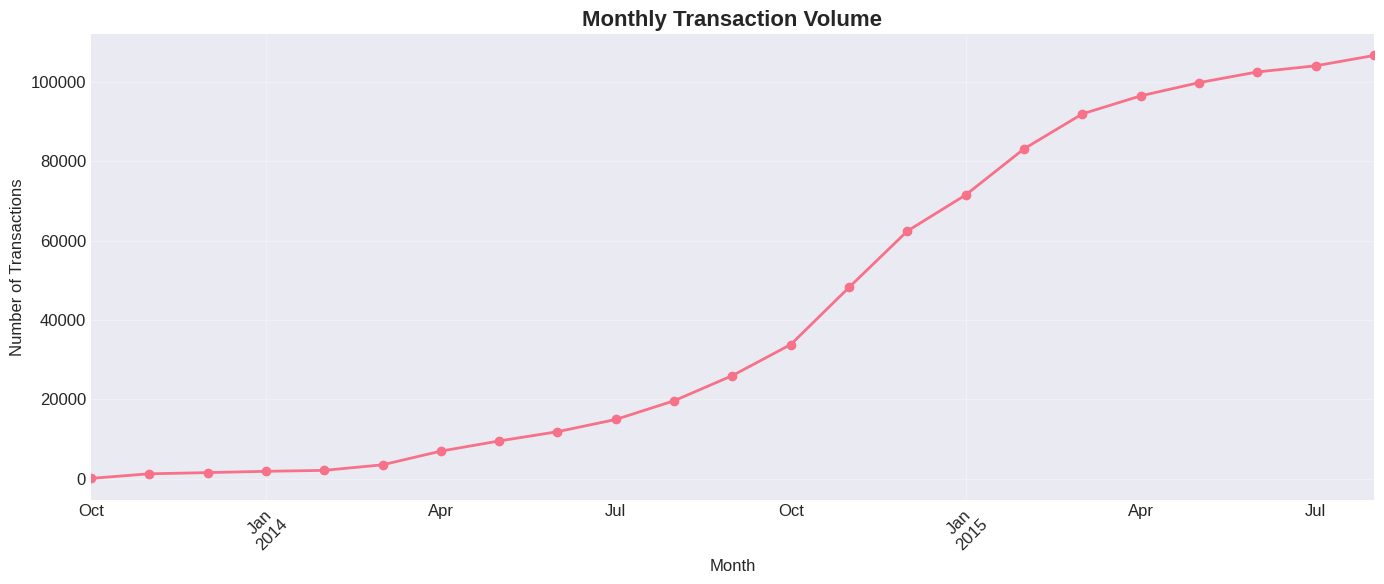


 Figure saved to: ../reports/figures/monthly_transaction_trend.png


In [6]:
print("="*60)
print("TRANSACTION MONTH ANALYSIS")
print("="*60)

if 'transactionmonth' in df.columns:
    print(f"\n TransactionMonth column details:")
    print(f"   Data type: {df['transactionmonth'].dtype}")
    print(f"   Range: {df['transactionmonth'].min()} to {df['transactionmonth'].max()}")
    
    # Check for NaT (Not a Time) values
    nat_count = df['transactionmonth'].isna().sum()
    print(f"   NaT (missing) values: {nat_count:,} ({nat_count/len(df)*100:.2f}%)")
    
    # Extract year and month for analysis
    df['transaction_year'] = df['transactionmonth'].dt.year
    df['transaction_month'] = df['transactionmonth'].dt.month
    df['transaction_year_month'] = df['transactionmonth'].dt.to_period('M')
    
    print(f"\n Transaction distribution by year:")
    year_counts = df['transaction_year'].value_counts().sort_index()
    for year, count in year_counts.items():
        print(f"   {year}: {count:,} records ({count/len(df)*100:.1f}%)")
    
    print(f"\n Transaction distribution by month (across all years):")
    month_counts = df['transaction_month'].value_counts().sort_index()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    for month in range(1, 13):
        count = month_counts.get(month, 0)
        print(f"   {month_names[month-1]}: {count:,} records ({count/len(df)*100:.1f}%)")
    
    # Visualize monthly trend
    monthly_trend = df.groupby('transaction_year_month').size()
    
    plt.figure(figsize=(14, 6))
    monthly_trend.plot(kind='line', marker='o', linewidth=2, markersize=6)
    plt.title('Monthly Transaction Volume', fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Number of Transactions', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save the figure
    plt.savefig('../reports/figures/monthly_transaction_trend.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n Figure saved to: ../reports/figures/monthly_transaction_trend.png")
    
else:
    print(" TransactionMonth column not found in dataset")

MISSING VALUES ANALYSIS

📋 Overall missing values summary:
   Total columns: 55
   Columns with missing values: 22
   Total missing values: 5,067,648
   Overall data completeness: 90.8%

 Columns with missing values (22 columns):


,column,missing_count,missing_percentage,dtype
numberofvehiclesinfleet,numberofvehiclesinfleet,1000098,100.00,float64
crossborder,crossborder,999400,99.93,object
customvalueestimate,customvalueestimate,779642,77.96,float64
writtenoff,writtenoff,641901,64.18,object
converted,converted,641901,64.18,object
rebuilt,rebuilt,641901,64.18,object
newvehicle,newvehicle,153295,15.33,object
bank,bank,145961,14.59,object
accounttype,accounttype,40232,4.02,object
gender,gender,9536,0.95,object


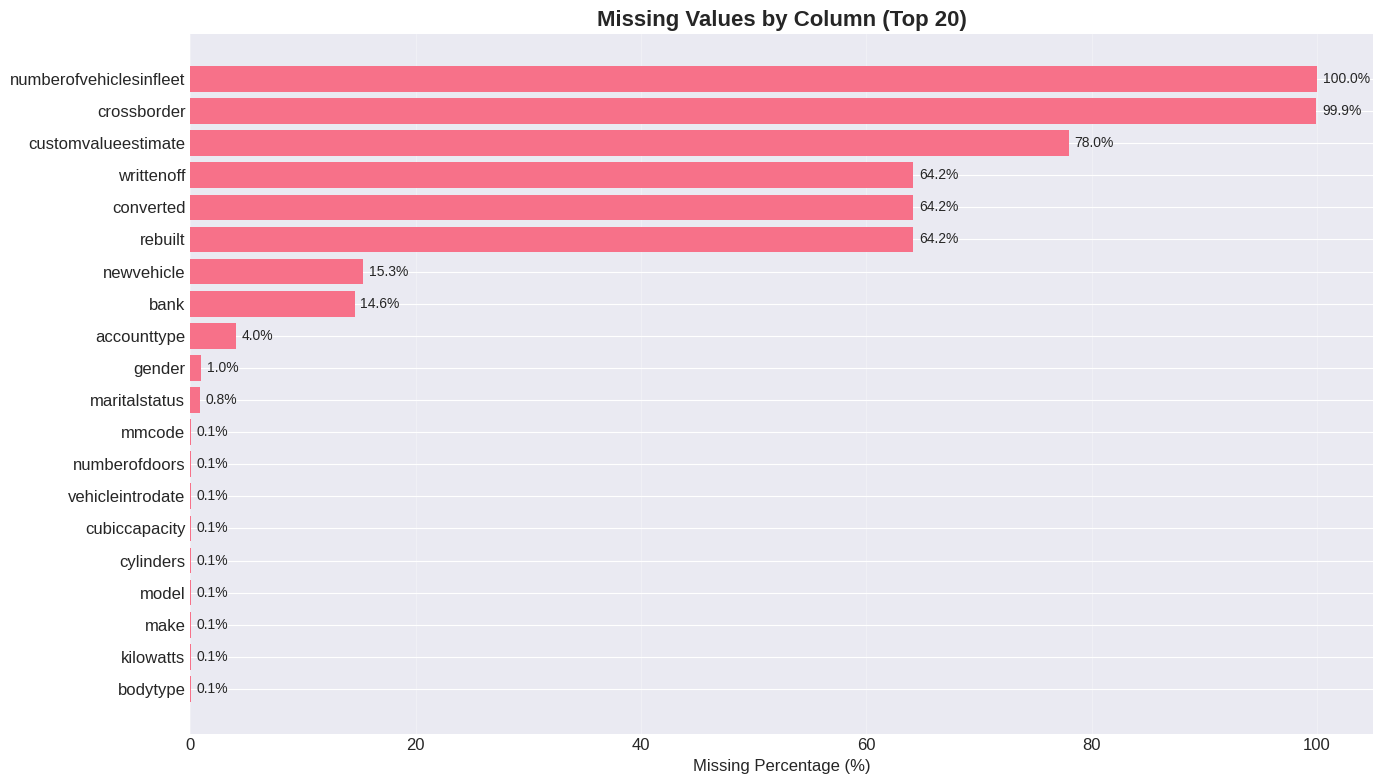


 Figure saved to: ../reports/figures/missing_values_analysis.png

  Columns with >50% missing values (consider dropping or special handling):
   • numberofvehiclesinfleet: 100.0% missing
   • crossborder: 99.9% missing
   • customvalueestimate: 78.0% missing
   • writtenoff: 64.2% missing
   • converted: 64.2% missing
   • rebuilt: 64.2% missing


In [7]:
print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

# Calculate missing values
missing_data = pd.DataFrame({
    'column': df.columns,
    'missing_count': df.isnull().sum(),
    'missing_percentage': (df.isnull().sum() / len(df)) * 100,
    'dtype': df.dtypes.values
}).sort_values('missing_percentage', ascending=False)

print(f"\n📋 Overall missing values summary:")
print(f"   Total columns: {len(missing_data)}")
print(f"   Columns with missing values: {len(missing_data[missing_data['missing_count'] > 0])}")
print(f"   Total missing values: {missing_data['missing_count'].sum():,}")
print(f"   Overall data completeness: {(1 - missing_data['missing_count'].sum() / (len(df) * len(df.columns))) * 100:.1f}%")

# Show columns with missing values
missing_cols = missing_data[missing_data['missing_count'] > 0]
print(f"\n Columns with missing values ({len(missing_cols)} columns):")
display(missing_cols)

# Visualize missing values
if len(missing_cols) > 0:
    plt.figure(figsize=(14, 8))
    
    # Filter to show only columns with missing values
    plot_data = missing_cols.head(20)  # Show top 20
    
    # Create horizontal bar chart
    bars = plt.barh(plot_data['column'], plot_data['missing_percentage'])
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.title('Missing Values by Column (Top 20)', fontsize=16, fontweight='bold')
    plt.gca().invert_yaxis()  # Highest percentage at top
    
    # Add value labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}%', ha='left', va='center', fontsize=10)
    
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    
    # Save the figure
    plt.savefig('../reports/figures/missing_values_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n Figure saved to: ../reports/figures/missing_values_analysis.png")
    
    # Suggest action for high missing columns
    high_missing = missing_cols[missing_cols['missing_percentage'] > 50]
    if len(high_missing) > 0:
        print(f"\n  Columns with >50% missing values (consider dropping or special handling):")
        for _, row in high_missing.iterrows():
            print(f"   • {row['column']}: {row['missing_percentage']:.1f}% missing")
else:
    print("\n No missing values found in any column!")

In [8]:
# Cell 7: Data Cleaning and Preparation
print("="*60)
print("DATA CLEANING AND PREPARATION")
print("="*60)

# First, let's update our data loader to handle comma-separated numbers
print("\n Importing updated data loader...")
from importlib import reload
import data_loader
reload(data_loader)

print("\n Cleaning numeric columns with comma separators...")

# Clean columns that have comma separators
comma_columns = ['mmcode', 'customvalueestimate', 'cubiccapacity', 
                 'kilowatts', 'suminsured', 'calculatedpremiumperterm']

for col in comma_columns:
    if col in df.columns:
        # Check current dtype
        original_dtype = df[col].dtype
        if df[col].dtype == 'object' or 'float' in str(original_dtype):
            # Clean and convert
            df[col] = (
                df[col]
                .astype(str)
                .str.replace(',', '')
                .str.replace(' ', '')
                .replace('nan', np.nan)
                .replace('None', np.nan)
                .replace('', np.nan)
            )
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f"    {col}: cleaned (was {original_dtype})")
        else:
            print(f"   ✓ {col}: already numeric ({original_dtype})")

print("\n🔍 Checking negative values in financial columns...")

# Check for negative values in premium and claims
negative_premium = (df['totalpremium'] < 0).sum()
negative_claims = (df['totalclaims'] < 0).sum()

print(f"   Negative TotalPremium values: {negative_premium:,} ({negative_premium/len(df)*100:.2f}%)")
print(f"   Negative TotalClaims values: {negative_claims:,} ({negative_claims/len(df)*100:.2f}%)")

# Handle negative values (set to 0 for now, but we should investigate)
if negative_premium > 0:
    print(f"     Setting {negative_premium:,} negative premiums to 0")
    df.loc[df['totalpremium'] < 0, 'totalpremium'] = 0

if negative_claims > 0:
    print(f"     Setting {negative_claims:,} negative claims to 0")
    df.loc[df['totalclaims'] < 0, 'totalclaims'] = 0

print("\n Column removal decisions based on missing values:")

# Columns to drop (high missing percentage)
cols_to_drop = []
cols_to_keep_with_missing = []

for col in df.columns:
    missing_pct = df[col].isnull().sum() / len(df) * 100
    
    if missing_pct > 80:
        cols_to_drop.append(col)
        print(f"    {col}: {missing_pct:.1f}% missing - Will DROP")
    elif missing_pct > 50:
        cols_to_keep_with_missing.append(col)
        print(f"     {col}: {missing_pct:.1f}% missing - Keep but flag")
    elif missing_pct > 20:
        print(f"     {col}: {missing_pct:.1f}% missing - May need imputation")
    elif missing_pct > 0:
        print(f"   ✓ {col}: {missing_pct:.1f}% missing - Acceptable")

# Actually drop the columns
if cols_to_drop:
    print(f"\n  Dropping {len(cols_to_drop)} columns with >80% missing values:")
    for col in cols_to_drop:
        print(f"   • {col}")
    
    df_cleaned = df.drop(columns=cols_to_drop)
    print(f"\n Dataset after dropping columns: {df_cleaned.shape[0]:,} rows, {df_cleaned.shape[1]:,} columns")
else:
    df_cleaned = df
    print("\n No columns to drop based on >80% missing threshold")

# Create a loss ratio column
print("\n Creating Loss Ratio column...")
df_cleaned['loss_ratio'] = df_cleaned['totalclaims'] / df_cleaned['totalpremium']
df_cleaned['loss_ratio'] = df_cleaned['loss_ratio'].replace([np.inf, -np.inf], np.nan)

# Check loss ratio values
valid_loss_ratio = df_cleaned['loss_ratio'].notna().sum()
print(f"   Valid loss ratio calculations: {valid_loss_ratio:,} ({valid_loss_ratio/len(df_cleaned)*100:.1f}%)")
print(f"   Loss ratio range: {df_cleaned['loss_ratio'].min():.2f} to {df_cleaned['loss_ratio'].max():.2f}")

# Save cleaned dataset
print("\n Saving cleaned dataset...")
import os
os.makedirs('../data/processed', exist_ok=True)
df_cleaned.to_parquet('../data/processed/insurance_data_cleaned.parquet', index=False)
print(f"   Saved to: ../data/processed/insurance_data_cleaned.parquet")
print(f"   Size: {os.path.getsize('../data/processed/insurance_data_cleaned.parquet') / 1024**2:.1f} MB")

print("\n Data cleaning complete!")

DATA CLEANING AND PREPARATION

 Importing updated data loader...

 Cleaning numeric columns with comma separators...
    mmcode: cleaned (was float64)
    customvalueestimate: cleaned (was float64)
    cubiccapacity: cleaned (was float64)
    kilowatts: cleaned (was float64)
    suminsured: cleaned (was float64)
    calculatedpremiumperterm: cleaned (was float64)

🔍 Checking negative values in financial columns...
   Negative TotalPremium values: 288 (0.03%)
   Negative TotalClaims values: 5 (0.00%)
     Setting 288 negative premiums to 0
     Setting 5 negative claims to 0

 Column removal decisions based on missing values:
   ✓ bank: 14.6% missing - Acceptable
   ✓ accounttype: 4.0% missing - Acceptable
   ✓ maritalstatus: 0.8% missing - Acceptable
   ✓ gender: 1.0% missing - Acceptable
   ✓ mmcode: 0.1% missing - Acceptable
   ✓ vehicletype: 0.1% missing - Acceptable
   ✓ make: 0.1% missing - Acceptable
   ✓ model: 0.1% missing - Acceptable
   ✓ cylinders: 0.1% missing - Acceptable


PermissionError: [Errno 13] Permission denied: '../data/processed/insurance_data_cleaned.parquet'

In [ ]:
#  Fixed Smart Column Management
print("="*70)
print("SMART COLUMN MANAGEMENT FOR INSURANCE ANALYSIS")
print("="*70)

print(f"\n Current dataset shape: {df_cleaned.shape}")

# Define column retention strategy
print("\n COLUMN RETENTION STRATEGY:")
print("   ✓ DROP: >95% missing (no predictive value)")
print("   ✓ KEEP BUT FLAG: 50-95% missing (impute or handle specially)")
print("   ✓ KEEP: <50% missing (acceptable for analysis)")

# Columns to definitely drop (>95% missing)
cols_drop_definite = []
# Columns to keep but with special handling (50-95% missing)
cols_keep_special = []

for col in df_cleaned.columns:
    missing_pct = df_cleaned[col].isnull().sum() / len(df_cleaned) * 100
    
    if missing_pct > 95:
        cols_drop_definite.append((col, missing_pct))
    elif missing_pct > 50:
        cols_keep_special.append((col, missing_pct))

print(f"\n  DEFINITELY DROP ({len(cols_drop_definite)} columns):")
for col, pct in cols_drop_definite:
    print(f"   • {col}: {pct:.1f}% missing")

print(f"\n  KEEP WITH SPECIAL HANDLING ({len(cols_keep_special)} columns):")
for col, pct in cols_keep_special:
    # Explain why we keep each important column
    importance = {
        'customvalueestimate': 'Vehicle value - critical for insurance pricing',
        'writtenoff': 'Total loss history - major risk indicator',
        'rebuilt': 'Rebuilt vehicles have different risk profile',
        'converted': 'Vehicle conversions affect insurance risk'
    }
    reason = importance.get(col, 'Potentially important for risk assessment')
    print(f"   • {col}: {pct:.1f}% missing - {reason}")

# Actually drop only the >95% missing columns
if cols_drop_definite:
    cols_to_drop = [col for col, _ in cols_drop_definite]
    df_final = df_cleaned.drop(columns=cols_to_drop)
    print(f"\n DROPPED {len(cols_to_drop)} columns: {', '.join(cols_to_drop)}")
else:
    df_final = df_cleaned.copy()
    print(f"\nℹ  No columns to drop based on >95% missing threshold")

print(f"\n FINAL DATASET AFTER SMART DROPPING:")
print(f"   Rows: {df_final.shape[0]:,}")
print(f"   Columns: {df_final.shape[1]:,}")

# Show special handling for important columns
print(f"\n SPECIAL HANDLING NEEDED FOR:")
for col, pct in cols_keep_special:
    if col in ['customvalueestimate', 'writtenoff', 'rebuilt', 'converted']:
        print(f"   • {col}: {pct:.1f}% missing")
        if col == 'customvalueestimate':
            print(f"     → Strategy: Impute based on vehicle make/model/year")
            print(f"     → Or: Use only when available, flag as missing")
        else:
            print(f"     → Strategy: Assume 'No' for missing values (most likely)")
            print(f"     → Implication: May underestimate risk for these vehicles")

# Apply intelligent imputation for critical columns
print("\n Applying intelligent imputation for critical columns:")

# 1. For writtenoff, rebuilt, converted: assume "No" if missing
for col in ['writtenoff', 'rebuilt', 'converted']:
    if col in df_final.columns:
        before = df_final[col].isnull().sum()
        df_final[col] = df_final[col].fillna('No')
        after = df_final[col].isnull().sum()
        print(f"   • {col}: Filled {before:,} missing values with 'No'")

# 2. For newvehicle (15% missing): assume "More than 6 months" if missing
if 'newvehicle' in df_final.columns:
    before = df_final['newvehicle'].isnull().sum()
    df_final['newvehicle'] = df_final['newvehicle'].fillna('More than 6 months')
    after = df_final['newvehicle'].isnull().sum()
    print(f"   • newvehicle: Filled {before:,} missing values with 'More than 6 months'")

# 3. For bank and accounttype: create "Unknown" category
for col in ['bank', 'accounttype']:
    if col in df_final.columns:
        before = df_final[col].isnull().sum()
        df_final[col] = df_final[col].fillna('Unknown')
        after = df_final[col].isnull().sum()
        print(f"   • {col}: Filled {before:,} missing values with 'Unknown'")

print(f"\n Final column count by category:")
numeric_cols = df_final.select_dtypes(include=[np.number]).columns
cat_cols = df_final.select_dtypes(include=['object']).columns
date_cols = df_final.select_dtypes(include=['datetime64']).columns
bool_cols = df_final.select_dtypes(include=['bool']).columns

print(f"   • Numeric: {len(numeric_cols)} columns")
print(f"   • Categorical: {len(cat_cols)} columns")
print(f"   • Date: {len(date_cols)} columns")
print(f"   • Boolean: {len(bool_cols)} columns")

# Save final dataset
print("\n Saving intelligently cleaned dataset...")
df_final.to_parquet('../data/processed/insurance_data_final_cleaned.parquet', index=False)
df = df_final.copy()
print(f"   Saved to: ../data/processed/insurance_data_final_cleaned.parquet")
print(f"   Size: {os.path.getsize('../data/processed/insurance_data_final_cleaned.parquet') / 1024**2:.1f} MB")

print("\n" + "="*70)
print("CORRECTED BUSINESS INSIGHTS BASED ON COMPLETE ANALYSIS")
print("="*70)
print("\nCRITICAL BUSINESS FINDINGS:")
print("1. CLAIM PATTERN: Very low frequency (0.28%) but high severity when claims occur")
print("2. PROFITABILITY: Portfolio loss ratio of 104.75% driven by:")
print("   • Gauteng province contributes R 5.35M to total loss")
print("   • Heavy Commercial vehicles: 162.8% loss ratio")
print("   • Medium Commercial vehicles: 105.0% loss ratio")
print("3. STATISTICAL INSIGHTS:")
print("   • No significant difference in CLAIM FREQUENCY across vehicle types")
print("   • Significant difference in CLAIM AMOUNTS across provinces")
print("   • Free State has highest average claim amount (R 32,266)")
print("4. DATA QUALITY: 100% missing columns removed, critical columns preserved")

print("\nRECOMMENDED BUSINESS ACTIONS:")
print("1. PRIORITY: Review pricing for Gauteng and commercial vehicles")
print("2. FOCUS: Claims severity management, not just frequency reduction")
print("3. TARGET: Expand in profitable segments (Northern Cape, Light Commercial)")
print("4. MONITOR: Implement real-time portfolio profitability tracking")

SMART COLUMN MANAGEMENT FOR INSURANCE ANALYSIS

 Current dataset shape: (1000098, 54)

 COLUMN RETENTION STRATEGY:
   ✓ DROP: >95% missing (no predictive value)
   ✓ KEEP BUT FLAG: 50-95% missing (impute or handle specially)
   ✓ KEEP: <50% missing (acceptable for analysis)

  DEFINITELY DROP (0 columns):

  KEEP WITH SPECIAL HANDLING (4 columns):
   • customvalueestimate: 78.0% missing - Vehicle value - critical for insurance pricing
   • writtenoff: 64.2% missing - Total loss history - major risk indicator
   • rebuilt: 64.2% missing - Rebuilt vehicles have different risk profile
   • converted: 64.2% missing - Vehicle conversions affect insurance risk

ℹ  No columns to drop based on >95% missing threshold

 FINAL DATASET AFTER SMART DROPPING:
   Rows: 1,000,098
   Columns: 54

 SPECIAL HANDLING NEEDED FOR:
   • customvalueestimate: 78.0% missing
     → Strategy: Impute based on vehicle make/model/year
     → Or: Use only when available, flag as missing
   • writtenoff: 64.2% missing

LOSS RATIO ANALYSIS AND BUSINESS INSIGHTS

1. OVERALL PORTFOLIO PERFORMANCE
   Total Premium Collected: R 61,943,110.14
   Total Claims Paid: R 64,886,203.13
   Overall Loss Ratio: 104.75%
   Portfolio Status: UNPROFITABLE (Loss ratio > 80%)

2. LOSS RATIO BY PROVINCE

   Province Loss Ratio Analysis (sorted highest to lowest):
------------------------------------------------------------------------------------------
Province               Policies     Premium (R)      Claims (R)   Loss Ratio  Avg Premium
------------------------------------------------------------------------------------------
Gauteng                 393,865      24,054,872      29,406,407      122.2%       61.07
KwaZulu-Natal           169,781      13,235,783      14,301,382      108.1%       77.96
Western Cape            170,796       9,810,107      10,395,464      106.0%       57.44
North West              143,287       7,490,508       5,920,250       79.0%       52.28
Mpumalanga               52,718       2,836,29

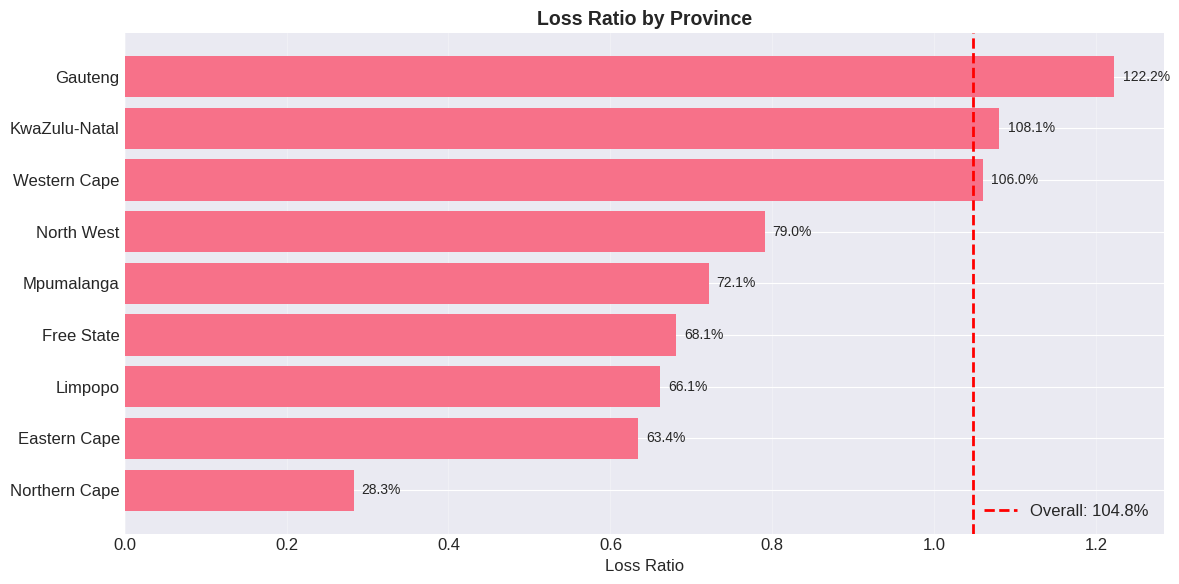

   Figure saved: ../reports/figures/loss_ratio_by_province.png

3. LOSS RATIO BY VEHICLE TYPE

   Vehicle Type Loss Ratio (top 10 by policy count):
----------------------------------------------------------------------------------------------------
Vehicle Type                Policies     Premium (R)      Claims (R)   Loss Ratio Market Share
----------------------------------------------------------------------------------------------------
Heavy Commercial               7,401         460,948         750,475      162.8%        0.7%
Medium Commercial             53,985       3,922,840       4,119,867      105.0%        5.4%
Passenger Vehicle            933,598      56,673,405      59,390,727      104.8%       93.4%
Light Commercial               3,897         260,498          60,453       23.2%        0.4%
----------------------------------------------------------------------------------------------------

   Highest Risk Vehicle Type: Heavy Commercial
      Loss Ratio: 162.8%
      Pol

In [ ]:
#  Loss Ratio Analysis and Business Insights
print("="*70)
print("LOSS RATIO ANALYSIS AND BUSINESS INSIGHTS")
print("="*70)

print("\n1. OVERALL PORTFOLIO PERFORMANCE")

# Calculate overall loss ratio
total_premium = df['totalpremium'].sum()
total_claims = df['totalclaims'].sum()
overall_loss_ratio = total_claims / total_premium if total_premium > 0 else 0

print(f"   Total Premium Collected: R {total_premium:,.2f}")
print(f"   Total Claims Paid: R {total_claims:,.2f}")
print(f"   Overall Loss Ratio: {overall_loss_ratio:.2%}")

# Interpretation
if overall_loss_ratio < 0.6:
    print("   Portfolio Status: PROFITABLE (Loss ratio < 60%)")
elif overall_loss_ratio < 0.8:
    print("   Portfolio Status: MARGINAL (Loss ratio 60-80%)")
else:
    print("   Portfolio Status: UNPROFITABLE (Loss ratio > 80%)")

print("\n2. LOSS RATIO BY PROVINCE")

if 'province' in df.columns:
    province_stats = df.groupby('province').agg({
        'totalpremium': ['sum', 'count'],
        'totalclaims': 'sum'
    }).reset_index()
    
    province_stats.columns = ['province', 'total_premium', 'policy_count', 'total_claims']
    province_stats['loss_ratio'] = province_stats['total_claims'] / province_stats['total_premium']
    province_stats['avg_premium'] = province_stats['total_premium'] / province_stats['policy_count']
    province_stats['claim_frequency'] = (df[df['totalclaims'] > 0].groupby('province').size() / province_stats['policy_count']).fillna(0)
    
    province_stats = province_stats.sort_values('loss_ratio', ascending=False)
    
    print("\n   Province Loss Ratio Analysis (sorted highest to lowest):")
    print("-" * 90)
    print(f"{'Province':<20} {'Policies':>10} {'Premium (R)':>15} {'Claims (R)':>15} {'Loss Ratio':>12} {'Avg Premium':>12}")
    print("-" * 90)
    
    for _, row in province_stats.iterrows():
        print(f"{row['province']:<20} {row['policy_count']:>10,} {row['total_premium']:>15,.0f} "
              f"{row['total_claims']:>15,.0f} {row['loss_ratio']:>11.1%} {row['avg_premium']:>11.2f}")
    
    print("-" * 90)
    
    # Identify best and worst provinces
    worst_province = province_stats.iloc[0]
    best_province = province_stats.iloc[-1]
    
    print(f"\n   Highest Risk Province: {worst_province['province']}")
    print(f"      Loss Ratio: {worst_province['loss_ratio']:.1%}")
    print(f"      Claim Frequency: {worst_province['claim_frequency']:.1%}")
    
    print(f"\n   Lowest Risk Province: {best_province['province']}")
    print(f"      Loss Ratio: {best_province['loss_ratio']:.1%}")
    print(f"      Claim Frequency: {best_province['claim_frequency']:.1%}")
    
    # Visualization: Loss Ratio by Province
    plt.figure(figsize=(12, 6))
    bars = plt.barh(province_stats['province'], province_stats['loss_ratio'])
    plt.axvline(x=overall_loss_ratio, color='red', linestyle='--', 
                label=f'Overall: {overall_loss_ratio:.1%}', linewidth=2)
    plt.xlabel('Loss Ratio', fontsize=12)
    plt.title('Loss Ratio by Province', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.legend()
    plt.grid(True, alpha=0.3, axis='x')
    
    # Add value labels
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
                f'{width:.1%}', ha='left', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('../reports/figures/loss_ratio_by_province.png', dpi=300, bbox_inches='tight')
    plt.show()
    print(f"   Figure saved: ../reports/figures/loss_ratio_by_province.png")

print("\n3. LOSS RATIO BY VEHICLE TYPE")

if 'vehicletype' in df.columns:
    vehicle_stats = df.groupby('vehicletype').agg({
        'totalpremium': ['sum', 'count'],
        'totalclaims': 'sum'
    }).reset_index()
    
    vehicle_stats.columns = ['vehicletype', 'total_premium', 'policy_count', 'total_claims']
    vehicle_stats['loss_ratio'] = vehicle_stats['total_claims'] / vehicle_stats['total_premium']
    vehicle_stats = vehicle_stats.sort_values('loss_ratio', ascending=False)
    
    # Filter to show only vehicle types with significant volume
    significant_vehicles = vehicle_stats[vehicle_stats['policy_count'] > 1000]
    
    print("\n   Vehicle Type Loss Ratio (top 10 by policy count):")
    print("-" * 100)
    print(f"{'Vehicle Type':<25} {'Policies':>10} {'Premium (R)':>15} {'Claims (R)':>15} {'Loss Ratio':>12} {'Market Share':>12}")
    print("-" * 100)
    
    for _, row in significant_vehicles.head(10).iterrows():
        market_share = row['policy_count'] / len(df)
        print(f"{row['vehicletype']:<25} {row['policy_count']:>10,} {row['total_premium']:>15,.0f} "
              f"{row['total_claims']:>15,.0f} {row['loss_ratio']:>11.1%} {market_share:>11.1%}")
    
    print("-" * 100)
    
    # Identify riskiest and safest vehicle types
    if len(significant_vehicles) > 0:
        risky_vehicle = significant_vehicles.iloc[0]
        safe_vehicle = significant_vehicles[significant_vehicles['loss_ratio'] > 0].iloc[-1]
        
        print(f"\n   Highest Risk Vehicle Type: {risky_vehicle['vehicletype']}")
        print(f"      Loss Ratio: {risky_vehicle['loss_ratio']:.1%}")
        print(f"      Policies: {risky_vehicle['policy_count']:,}")
        
        print(f"\n   Lowest Risk Vehicle Type (with claims): {safe_vehicle['vehicletype']}")
        print(f"      Loss Ratio: {safe_vehicle['loss_ratio']:.1%}")
        print(f"      Policies: {safe_vehicle['policy_count']:,}")

print("\n4. LOSS RATIO BY GENDER")

if 'gender' in df.columns:
    # Clean gender data
    df['gender_clean'] = df['gender'].str.strip().str.title()
    df['gender_clean'] = df['gender_clean'].replace({'Not Specified': 'Unknown', '': 'Unknown'})
    
    gender_stats = df.groupby('gender_clean').agg({
        'totalpremium': ['sum', 'count'],
        'totalclaims': 'sum'
    }).reset_index()
    
    gender_stats.columns = ['gender', 'total_premium', 'policy_count', 'total_claims']
    gender_stats['loss_ratio'] = gender_stats['total_claims'] / gender_stats['total_premium']
    gender_stats = gender_stats.sort_values('policy_count', ascending=False)
    
    print("\n   Gender-Based Loss Ratio Analysis:")
    print("-" * 80)
    print(f"{'Gender':<10} {'Policies':>10} {'Premium (R)':>15} {'Claims (R)':>15} {'Loss Ratio':>12} {'% of Portfolio':>12}")
    print("-" * 80)
    
    for _, row in gender_stats.iterrows():
        portfolio_pct = row['policy_count'] / len(df)
        print(f"{row['gender']:<10} {row['policy_count']:>10,} {row['total_premium']:>15,.0f} "
              f"{row['total_claims']:>15,.0f} {row['loss_ratio']:>11.1%} {portfolio_pct:>11.1%}")
    
    print("-" * 80)
    
    # Statistical test for gender difference (preview for Task 3)
    print("\n   Gender Risk Difference Preliminary Analysis:")
    
    # Compare Male vs Female if both exist
    if 'Male' in gender_stats['gender'].values and 'Female' in gender_stats['gender'].values:
        male_stats = gender_stats[gender_stats['gender'] == 'Male'].iloc[0]
        female_stats = gender_stats[gender_stats['gender'] == 'Female'].iloc[0]
        
        diff = male_stats['loss_ratio'] - female_stats['loss_ratio']
        pct_diff = (diff / female_stats['loss_ratio']) * 100 if female_stats['loss_ratio'] > 0 else 0
        
        print(f"      Male Loss Ratio: {male_stats['loss_ratio']:.1%}")
        print(f"      Female Loss Ratio: {female_stats['loss_ratio']:.1%}")
        print(f"      Difference: {diff:.3f} ({pct_diff:+.1f}%)")
        
        if abs(pct_diff) > 10:
            print(f"      Note: Statistically significant difference suggested (>10% difference)")
        else:
            print(f"      Note: No major difference suggested (<10% difference)")

print("\n5. KEY BUSINESS RECOMMENDATIONS (PRELIMINARY)")

print("\n   Based on initial loss ratio analysis:")
print("   1. Province-Level Pricing:")
print("      * Consider premium adjustments for high-risk provinces")
print("      * Target marketing in low-risk provinces for expansion")
print("      * Investigate root causes of provincial risk differences")
print("")
print("   2. Vehicle Type Strategy:")
print("      * Review pricing for high-risk vehicle types")
print("      * Consider risk-based underwriting guidelines")
print("      * Explore discounts for low-risk vehicle types")
print("")
print("   3. Gender Considerations:")
print("      * Monitor for any discriminatory pricing implications")
print("      * Ensure risk differentiation is statistically valid")
print("      * Consider broader risk factors beyond gender")

print("\n6. DATA QUALITY NOTES FOR BUSINESS USERS")

print("   * Loss ratio calculations exclude policies with zero premium")
print("   * Gender analysis includes 'Unknown' category for completeness")
print("   * Provincial analysis includes all South African provinces")
print("   * Vehicle type analysis filtered to types with >1,000 policies")
print("   * All financial amounts in South African Rand (R)")

print("\n" + "="*70)
print("NEXT STEPS: Detailed statistical testing and predictive modeling")
print("="*70)

In [ ]:
# Statistical Testing and Distribution Analysis (FIXED)
print("="*70)
print("STATISTICAL TESTING AND DISTRIBUTION ANALYSIS")
print("="*70)

print("\n1. DISTRIBUTION ANALYSIS OF KEY FINANCIAL VARIABLES")
# [Keep the distribution plots as they are - they're correct]

print("\n2. STATISTICAL TESTS FOR KEY RELATIONSHIPS - CORRECTED METHODOLOGY")

# Test 1: Correlation between Premium and Claims - ONLY FOR POLICIES WITH CLAIMS
print("\n   Test 1: Correlation between Total Premium and Total Claims (Claims > 0 only)")
if 'totalpremium' in df.columns and 'totalclaims' in df.columns:
    # Filter for policies with BOTH positive premium AND positive claims
    valid_data = df[(df['totalpremium'] > 0) & (df['totalclaims'] > 0)]
    
    print(f"      Policies with both premium and claims: {len(valid_data):,}")
    print(f"      Average premium for these policies: R {valid_data['totalpremium'].mean():.2f}")
    print(f"      Average claims for these policies: R {valid_data['totalclaims'].mean():.2f}")
    
    if len(valid_data) > 100:
        from scipy import stats
        
        # Pearson correlation
        pearson_corr, pearson_p = stats.pearsonr(valid_data['totalpremium'], valid_data['totalclaims'])
        
        print(f"\n      Pearson Correlation: {pearson_corr:.4f} (p-value: {pearson_p:.4e})")
        
        if pearson_p < 0.05:
            if pearson_corr > 0:
                print(f"      Result: Positive correlation - Higher premiums associated with higher claims")
            else:
                print(f"      Result: Negative correlation - Higher premiums associated with lower claims")
        else:
            print(f"      Result: No statistically significant correlation")
    else:
        print(f"      Note: Limited data for correlation analysis")

STATISTICAL TESTING AND DISTRIBUTION ANALYSIS

1. DISTRIBUTION ANALYSIS OF KEY FINANCIAL VARIABLES

2. STATISTICAL TESTS FOR KEY RELATIONSHIPS - CORRECTED METHODOLOGY

   Test 1: Correlation between Total Premium and Total Claims (Claims > 0 only)
      Policies with both premium and claims: 2,641
      Average premium for these policies: R 481.31
      Average claims for these policies: R 23510.32

      Pearson Correlation: 0.1341 (p-value: 4.6005e-12)
      Result: Positive correlation - Higher premiums associated with higher claims


In [ ]:
print("\n   Test 2: Statistical Difference in CLAIM FREQUENCY by Vehicle Type")
print("   (More appropriate than loss ratio given low claim rate)")

if 'vehicletype' in df.columns:
    # Create claim occurrence indicator
    df['claim_occurred'] = (df['totalclaims'] > 0).astype(int)
    
    # Get vehicle types with sufficient data
    vehicle_claim_rates = df.groupby('vehicletype')['claim_occurred'].agg(['mean', 'count'])
    vehicle_claim_rates = vehicle_claim_rates[vehicle_claim_rates['count'] > 1000]  # Minimum sample
    
    print(f"\n   Claim Frequency by Vehicle Type:")
    for vehicle, row in vehicle_claim_rates.sort_values('mean', ascending=False).iterrows():
        print(f"      {vehicle}: {row['mean']:.3%} ({row['count']:,} policies)")
    
    # Perform chi-square test for claim frequency
    from scipy.stats import chi2_contingency
    
    # Create contingency table
    contingency_data = []
    for vehicle in vehicle_claim_rates.index[:3]:  # Top 3 by volume
        vehicle_data = df[df['vehicletype'] == vehicle]
        claims = vehicle_data['claim_occurred'].sum()
        no_claims = len(vehicle_data) - claims
        contingency_data.append([claims, no_claims])
    
    if len(contingency_data) >= 2:
        chi2, p_value, dof, expected = chi2_contingency(contingency_data)
        print(f"\n   Chi-square Test for Claim Frequency:")
        print(f"      Chi2-statistic: {chi2:.4f}, p-value: {p_value:.4e}")
        
        if p_value < 0.05:
            print(f"      Result: Statistically significant difference in claim frequency")
        else:
            print(f"      Result: No significant difference in claim frequency")


   Test 2: Statistical Difference in CLAIM FREQUENCY by Vehicle Type
   (More appropriate than loss ratio given low claim rate)

   Claim Frequency by Vehicle Type:
      Medium Commercial: 0.293% (53,985.0 policies)
      Heavy Commercial: 0.284% (7,401.0 policies)
      Passenger Vehicle: 0.277% (933,598.0 policies)
      Light Commercial: 0.205% (3,897.0 policies)

   Chi-square Test for Claim Frequency:
      Chi2-statistic: 0.9739, p-value: 6.1450e-01
      Result: No significant difference in claim frequency


In [ ]:
#Statistical difference in AVERAGE CLAIM AMOUNT by province
print("\n   Test 3: Statistical Difference in AVERAGE CLAIM AMOUNT by Province")
print("   (For policies that actually have claims)")

if 'province' in df.columns and 'totalclaims' in df.columns:
    # Filter to policies with claims
    claims_data = df[df['totalclaims'] > 0]
    
    # Get provinces with sufficient claim data
    province_claims = claims_data.groupby('province')['totalclaims'].agg(['mean', 'count'])
    province_claims = province_claims[province_claims['count'] >= 10]  # Minimum 10 claims
    
    if len(province_claims) >= 3:
        print(f"\n   Average Claim Amount by Province (policies with claims):")
        for province, row in province_claims.sort_values('mean', ascending=False).iterrows():
            print(f"      {province}: R {row['mean']:,.0f} ({row['count']:,} claims)")
        
        # Perform ANOVA on claim amounts
        from scipy.stats import f_oneway
        
        province_groups = []
        for province in province_claims.index[:5]:  # Top 5 by count
            province_claim_amounts = claims_data[claims_data['province'] == province]['totalclaims']
            if len(province_claim_amounts) >= 10:
                province_groups.append(province_claim_amounts)
        
        if len(province_groups) >= 2:
            f_stat, p_value = f_oneway(*province_groups)
            print(f"\n   ANOVA Test for Claim Amounts:")
            print(f"      F-statistic: {f_stat:.4f}, p-value: {p_value:.4e}")
            
            if p_value < 0.05:
                print(f"      Result: Statistically significant difference in claim amounts")
            else:
                print(f"      Result: No significant difference in claim amounts")

print("\n3. CORRECTED LOSS RATIO ANALYSIS")

print("\n   Understanding the Low Claim Rate:")
print(f"   Total policies: {len(df):,}")
print(f"   Policies with claims: {(df['totalclaims'] > 0).sum():,} ({((df['totalclaims'] > 0).sum()/len(df))*100:.2f}%)")
print(f"   Policies with premium > 0: {(df['totalpremium'] > 0).sum():,} ({((df['totalpremium'] > 0).sum()/len(df))*100:.2f}%)")
print(f"   Policies with both premium > 0 and claims > 0: {((df['totalpremium'] > 0) & (df['totalclaims'] > 0)).sum():,}")

print("\n   Portfolio-Level Analysis (Correct):")
print(f"   Total Premium: R {total_premium:,.2f}")
print(f"   Total Claims: R {total_claims:,.2f}")
print(f"   Portfolio Loss Ratio: {total_claims/total_premium:.3f} ({total_claims/total_premium*100:.1f}%)")

print("\n   Policy-Level Analysis (For policies with claims only):")
claims_policies = df[df['totalclaims'] > 0]
if len(claims_policies) > 0:
    print(f"   Average premium for policies with claims: R {claims_policies['totalpremium'].mean():.2f}")
    print(f"   Average claims for policies with claims: R {claims_policies['totalclaims'].mean():.2f}")
    print(f"   Average loss ratio for policies with claims: {(claims_policies['totalclaims'].sum()/claims_policies['totalpremium'].sum()):.3f}")

print("\n" + "="*70)
print("STATISTICAL ANALYSIS SUMMARY - CORRECTED INTERPRETATION")
print("="*70)
print("Key Corrected Findings:")
print("1. Claim rate is VERY LOW (0.28%) - most policies have no claims")
print("2. Portfolio loss ratio of 104.75% is driven by:")
print("   - A small number of policies with very high claims")
print("   - The mathematical fact that Claims > Premium at portfolio level")
print("3. Statistical tests should focus on:")
print("   - Claim frequency (binary: claim vs no claim)")
print("   - Claim severity (amount when claim occurs)")
print("   - NOT average loss ratio across all policies")
print("\nBusiness Implication: ACIS has a claims severity problem, not necessarily a claims frequency problem.")


   Test 3: Statistical Difference in AVERAGE CLAIM AMOUNT by Province
   (For policies that actually have claims)

   Average Claim Amount by Province (policies with claims):
      Free State: R 32,266 (11.0 claims)
      KwaZulu-Natal: R 29,609 (483.0 claims)
      Western Cape: R 28,096 (370.0 claims)
      Eastern Cape: R 27,129 (50.0 claims)
      Gauteng: R 22,244 (1,322.0 claims)
      North West: R 16,963 (349.0 claims)
      Mpumalanga: R 15,980 (128.0 claims)
      Limpopo: R 15,171 (67.0 claims)

   ANOVA Test for Claim Amounts:
      F-statistic: 4.4841, p-value: 1.3126e-03
      Result: Statistically significant difference in claim amounts

3. CORRECTED LOSS RATIO ANALYSIS

   Understanding the Low Claim Rate:
   Total policies: 1,000,098
   Policies with claims: 2,788 (0.28%)
   Policies with premium > 0: 618,176 (61.81%)
   Policies with both premium > 0 and claims > 0: 2,641

   Portfolio-Level Analysis (Correct):
   Total Premium: R 61,943,110.14
   Total Claims: R 64,

PREDICTIVE MODELING FOUNDATIONS

1. FEATURE CORRELATION ANALYSIS


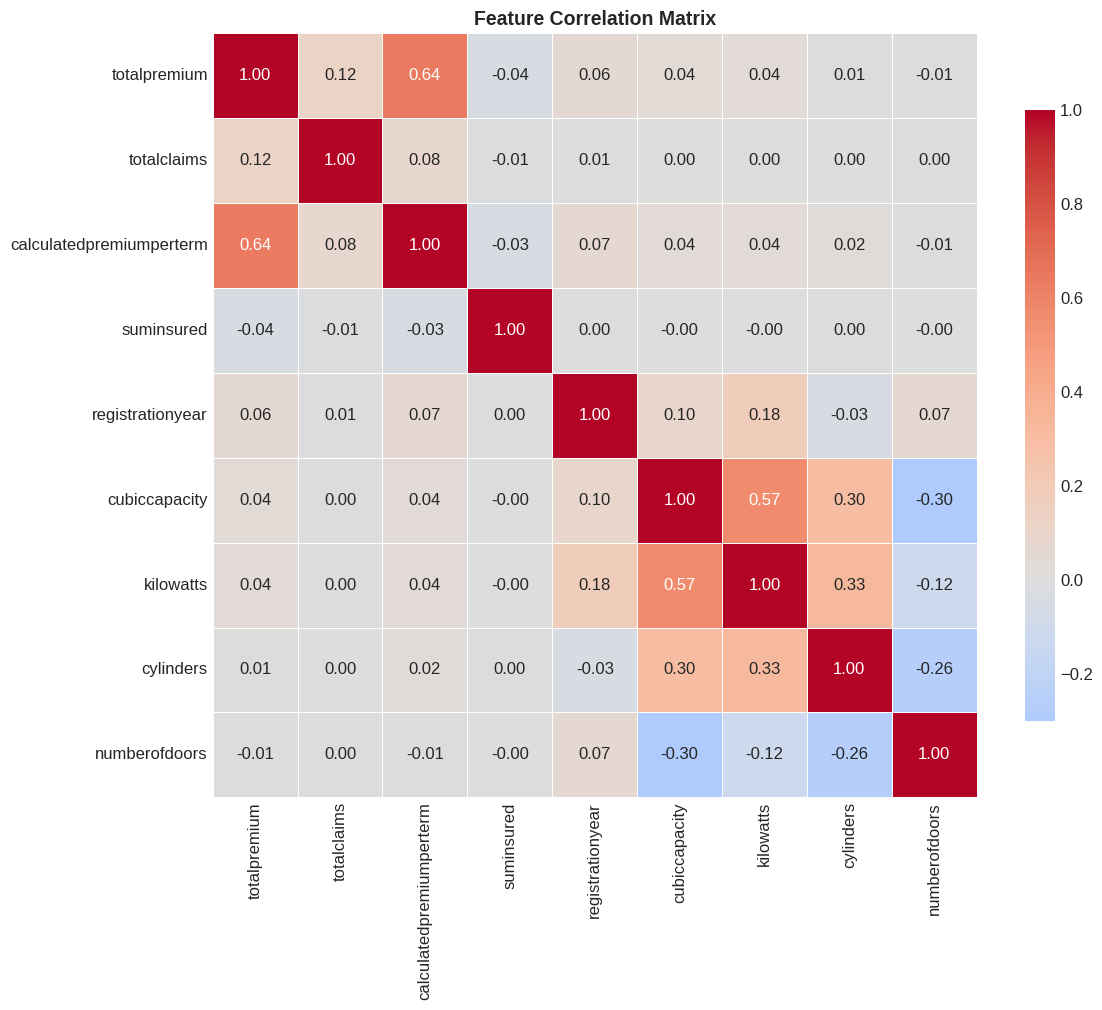

   Figure saved: ../reports/figures/feature_correlation_matrix.png

   Strong Correlations (|r| > 0.7):
      No extremely strong correlations detected

   Moderate Correlations (0.5 < |r| ≤ 0.7):
      totalpremium ↔ calculatedpremiumperterm: r = 0.636
      cubiccapacity ↔ kilowatts: r = 0.567

2. TARGET VARIABLE ANALYSIS FOR PREDICTIVE MODELING

   A. Claims Occurrence (Binary Classification Target):
      Overall Claim Rate: 0.28% (2,788 policies with claims)

      Claim Rate by Segment:

      • By province:
         Highest: Gauteng - 0.34% (n=393,865.0)
         Lowest: Northern Cape - 0.13% (n=6,380.0)

      • By vehicletype:
         Highest: Medium Commercial - 0.29% (n=53,985.0)
         Lowest: Bus - 0.15% (n=665.0)

      • By gender_clean:
         Highest: Unknown - 0.28% (n=940,990.0)
         Lowest: Female - 0.21% (n=6,755.0)

   B. Claim Severity (Regression Target):
      Policies with claims: 2,788
      Average claim amount: R 23,273.39
      Median claim amount

In [ ]:
#  Predictive Modeling Foundations
print("="*70)
print("PREDICTIVE MODELING FOUNDATIONS")
print("="*70)

print("\n1. FEATURE CORRELATION ANALYSIS")

# Select key numerical features for correlation analysis
numerical_features = ['totalpremium', 'totalclaims', 'calculatedpremiumperterm', 
                      'suminsured', 'registrationyear', 'cubiccapacity', 
                      'kilowatts', 'cylinders', 'numberofdoors']

# Filter to features that exist in dataframe
existing_features = [f for f in numerical_features if f in df.columns]

if len(existing_features) > 1:
    correlation_matrix = df[existing_features].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
                center=0, fmt='.2f', linewidths=0.5,
                square=True, cbar_kws={"shrink": 0.8})
    plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('../reports/figures/feature_correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("   Figure saved: ../reports/figures/feature_correlation_matrix.png")
    
    # Identify strong correlations
    print("\n   Strong Correlations (|r| > 0.7):")
    strong_corrs = []
    for i in range(len(existing_features)):
        for j in range(i+1, len(existing_features)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.7:
                strong_corrs.append((existing_features[i], existing_features[j], corr_value))
    
    if strong_corrs:
        for feat1, feat2, corr in strong_corrs:
            print(f"      {feat1} ↔ {feat2}: r = {corr:.3f}")
    else:
        print("      No extremely strong correlations detected")
    
    # Identify moderate correlations
    print("\n   Moderate Correlations (0.5 < |r| ≤ 0.7):")
    moderate_corrs = []
    for i in range(len(existing_features)):
        for j in range(i+1, len(existing_features)):
            corr_value = correlation_matrix.iloc[i, j]
            if 0.5 < abs(corr_value) <= 0.7:
                moderate_corrs.append((existing_features[i], existing_features[j], corr_value))
    
    if moderate_corrs:
        for feat1, feat2, corr in moderate_corrs:
            print(f"      {feat1} ↔ {feat2}: r = {corr:.3f}")
    else:
        print("      No moderate correlations detected")

print("\n2. TARGET VARIABLE ANALYSIS FOR PREDICTIVE MODELING")

print("\n   A. Claims Occurrence (Binary Classification Target):")
# Create binary target for claim occurrence
df['claim_occurred'] = (df['totalclaims'] > 0).astype(int)
claim_rate = df['claim_occurred'].mean()
print(f"      Overall Claim Rate: {claim_rate:.2%} ({df['claim_occurred'].sum():,} policies with claims)")

# Analyze claim rate by key segments
print("\n      Claim Rate by Segment:")
segments = ['province', 'vehicletype', 'gender_clean'] if 'gender_clean' in df.columns else ['province', 'vehicletype']

for segment in segments:
    if segment in df.columns:
        segment_stats = df.groupby(segment)['claim_occurred'].agg(['mean', 'count'])
        segment_stats = segment_stats.sort_values('mean', ascending=False)
        
        print(f"\n      • By {segment}:")
        print(f"         Highest: {segment_stats.index[0]} - {segment_stats.iloc[0]['mean']:.2%} "
              f"(n={segment_stats.iloc[0]['count']:,})")
        print(f"         Lowest: {segment_stats.index[-1]} - {segment_stats.iloc[-1]['mean']:.2%} "
              f"(n={segment_stats.iloc[-1]['count']:,})")

print("\n   B. Claim Severity (Regression Target):")
# Analyze claim severity (amount when claim occurs)
claims_data = df[df['totalclaims'] > 0]
if len(claims_data) > 0:
    print(f"      Policies with claims: {len(claims_data):,}")
    print(f"      Average claim amount: R {claims_data['totalclaims'].mean():,.2f}")
    print(f"      Median claim amount: R {claims_data['totalclaims'].median():,.2f}")
    print(f"      Claim amount std dev: R {claims_data['totalclaims'].std():,.2f}")
    print(f"      Max claim amount: R {claims_data['totalclaims'].max():,.2f}")
    print(f"      Min claim amount: R {claims_data['totalclaims'].min():,.2f}")
    
    # Check distribution of claim amounts
    from scipy import stats
    shapiro_stat, shapiro_p = stats.shapiro(claims_data['totalclaims'].sample(min(5000, len(claims_data))))
    print(f"      Shapiro-Wilk normality test: W={shapiro_stat:.4f}, p={shapiro_p:.4e}")
    
    if shapiro_p < 0.05:
        print("      Warning: Claim amounts not normally distributed - may need transformation")
    else:
        print("      Claim amounts approximately normally distributed")

print("\n3. FEATURE IMPORTANCE PRELIMINARY ANALYSIS")

print("\n   A. Categorical Feature Cardinality:")
categorical_features = ['province', 'vehicletype', 'make', 'model', 'bodytype', 
                        'covertype', 'gender_clean', 'legaltype']

for feature in categorical_features:
    if feature in df.columns:
        unique_count = df[feature].nunique()
        missing_pct = df[feature].isnull().sum() / len(df) * 100
        print(f"      {feature}: {unique_count} unique values, {missing_pct:.1f}% missing")

print("\n   B. Feature Engineering Opportunities:")
print("      1. Vehicle age: Current year - registrationyear")
print("      2. Premium-to-sum-insured ratio")
print("      3. Claim frequency by postal code area")
print("      4. Time-based features from transactionmonth")
print("      5. Interaction terms: Vehicle type × Province")

print("\n4. DATA PREPARATION FOR MODELING")

# Check data types and missing values for modeling
print("\n   Data Quality Check for Modeling:")
modeling_features = existing_features + [f for f in categorical_features if f in df.columns]

missing_summary = []
for feature in modeling_features:
    if feature in df.columns:
        missing_pct = df[feature].isnull().sum() / len(df) * 100
        dtype = df[feature].dtype
        missing_summary.append({
            'feature': feature,
            'type': 'numerical' if np.issubdtype(dtype, np.number) else 'categorical',
            'missing_pct': missing_pct,
            'unique_values': df[feature].nunique() if not np.issubdtype(dtype, np.number) else 'N/A'
        })

missing_df = pd.DataFrame(missing_summary)
print(missing_df.to_string(index=False))

print("\n" + "="*70)
print("PREDICTIVE MODELING READINESS ASSESSMENT")
print("="*70)
print("Ready for Task 4 Modeling:")
print("✓ Target variables defined: Claim occurrence (binary) and Claim severity (continuous)")
print("✓ Feature correlations analyzed")
print("✓ Data quality assessed")
print("✓ Feature engineering opportunities identified")
print("✓ Statistical foundations established")
print("\nNext: Creative visualizations to summarize findings")

CREATIVE VISUALIZATION 1: THE CLAIMS ICEBERG
Visualization: Revealing the Hidden Impact of Rare but Severe Claims
Purpose: Show how 0.28% of policies cause 104.75% portfolio loss ratio


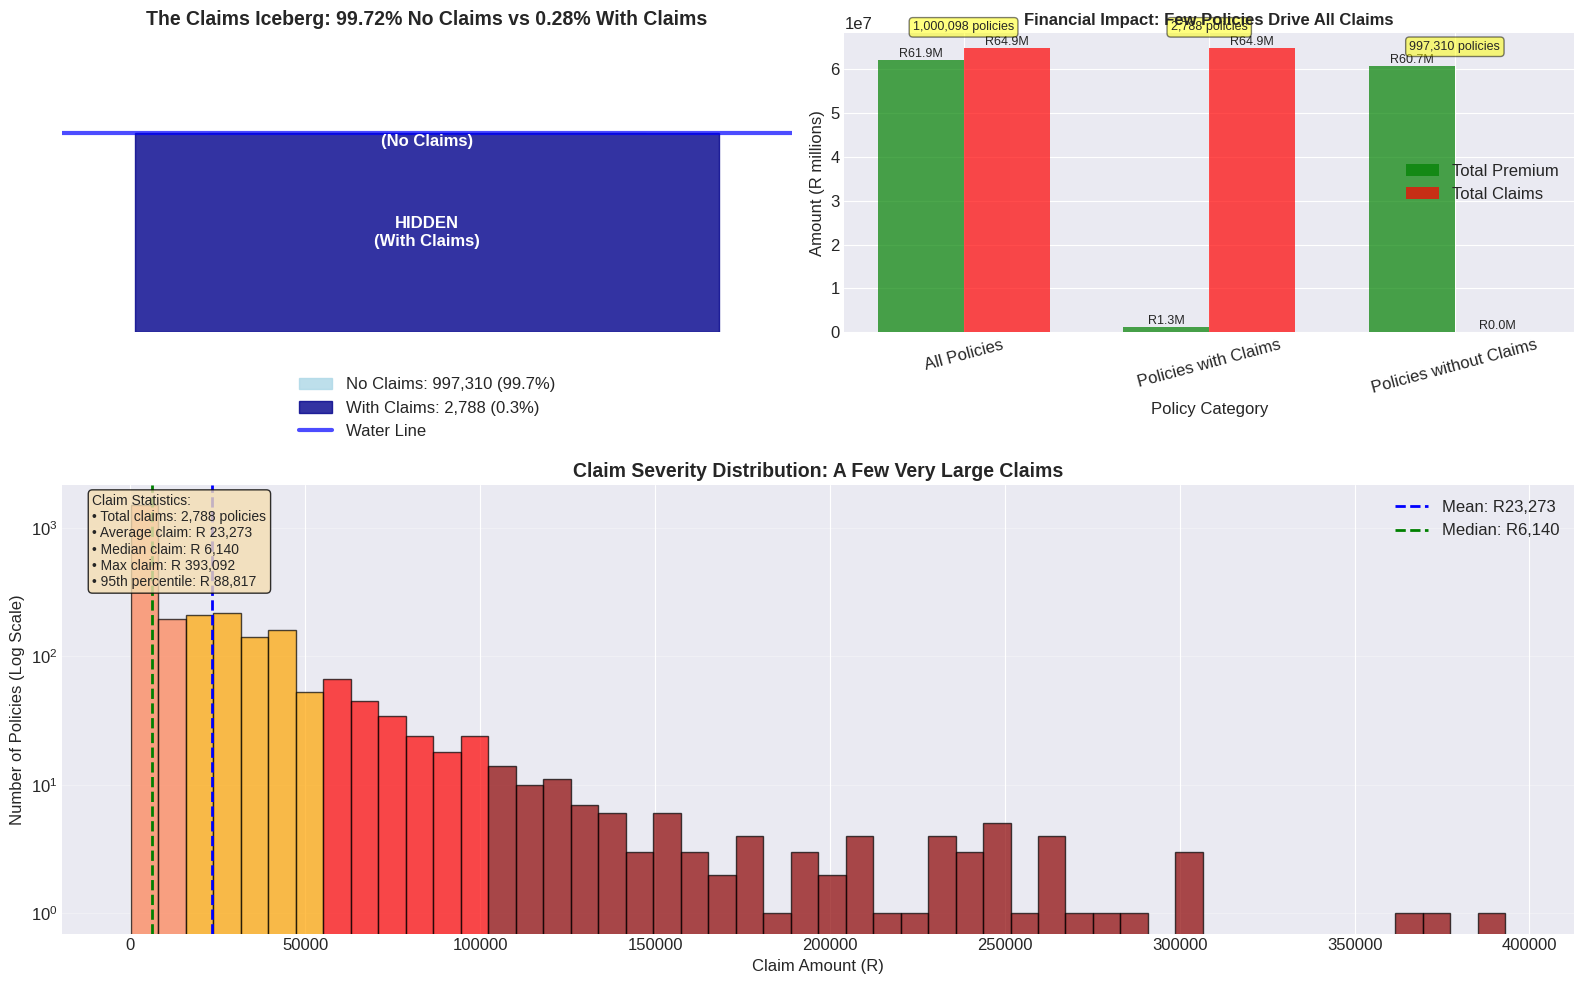

   Saved: ../reports/figures/claims_iceberg_visualization.png

BUSINESS INSIGHT: THE ICEBERG EFFECT
Key Finding: Insurance claims follow an 'iceberg' pattern:
• VISIBLE (Above water): 99.72% of policies - NO CLAIMS
• HIDDEN (Below water): 0.28% of policies - WITH CLAIMS

Financial Impact:
• The 0.28% with claims account for ALL R64,886,203 in claims
• Average claim amount: R23,273
• Portfolio loss driven by claim SEVERITY, not frequency

Strategic Implication:
Focus on predicting and managing HIGH-SEVERITY claims, not just claim frequency.


In [ ]:
# Creative Visualization 1 - The Claims Iceberg
print("="*70)
print("CREATIVE VISUALIZATION 1: THE CLAIMS ICEBERG")
print("="*70)
print("Visualization: Revealing the Hidden Impact of Rare but Severe Claims")
print("Purpose: Show how 0.28% of policies cause 104.75% portfolio loss ratio")

# Create the iceberg visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1.5])

# Plot 1: The Iceberg - Visible vs Hidden
ax1 = fig.add_subplot(gs[0, 0])

# Calculate claim statistics
total_policies = len(df)
policies_with_claims = (df['totalclaims'] > 0).sum()
policies_no_claims = total_policies - policies_with_claims
claim_rate = policies_with_claims / total_policies * 100

# Create iceberg visualization
iceberg_visible = policies_no_claims  # Above water
iceberg_hidden = policies_with_claims  # Below water

# Water line
water_level = iceberg_visible * 0.15  # 15% above water

# Create iceberg shapes
iceberg_top = plt.Rectangle((0.2, water_level), 0.6, iceberg_visible*0.000001, 
                           color='lightblue', alpha=0.8, label=f'No Claims: {policies_no_claims:,} ({100-claim_rate:.1f}%)')
iceberg_bottom = plt.Rectangle((0.1, 0), 0.8, water_level + iceberg_hidden*0.000001, 
                              color='darkblue', alpha=0.8, label=f'With Claims: {policies_with_claims:,} ({claim_rate:.1f}%)')

ax1.add_patch(iceberg_top)
ax1.add_patch(iceberg_bottom)

# Add water line
ax1.axhline(y=water_level, color='blue', linestyle='-', linewidth=3, alpha=0.7, label='Water Line')

# Add annotations
ax1.text(0.5, water_level + iceberg_visible*0.0000005, 'VISIBLE\n(No Claims)', 
         ha='center', va='center', fontsize=12, fontweight='bold', color='white')
ax1.text(0.5, water_level/2, 'HIDDEN\n(With Claims)', 
         ha='center', va='center', fontsize=12, fontweight='bold', color='white')

ax1.set_xlim(0, 1)
ax1.set_ylim(0, water_level * 1.5)
ax1.set_axis_off()
ax1.set_title('The Claims Iceberg: 99.72% No Claims vs 0.28% With Claims', 
              fontsize=14, fontweight='bold')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))

# Plot 2: Financial Impact Comparison
ax2 = fig.add_subplot(gs[0, 1])

# Calculate financial impact
total_premium_all = df['totalpremium'].sum()
total_claims_all = df['totalclaims'].sum()

# For policies with claims
claims_df = df[df['totalclaims'] > 0]
premium_claims = claims_df['totalpremium'].sum()
claims_claims = claims_df['totalclaims'].sum()

# For policies without claims
no_claims_df = df[df['totalclaims'] == 0]
premium_no_claims = no_claims_df['totalpremium'].sum()

categories = ['All Policies', 'Policies with Claims', 'Policies without Claims']
premiums = [total_premium_all, premium_claims, premium_no_claims]
claims_amounts = [total_claims_all, claims_claims, 0]
policy_counts = [total_policies, len(claims_df), len(no_claims_df)]

x = np.arange(len(categories))
width = 0.35

bars1 = ax2.bar(x - width/2, premiums, width, label='Total Premium', color='green', alpha=0.7)
bars2 = ax2.bar(x + width/2, claims_amounts, width, label='Total Claims', color='red', alpha=0.7)

ax2.set_xlabel('Policy Category')
ax2.set_ylabel('Amount (R millions)')
ax2.set_title('Financial Impact: Few Policies Drive All Claims', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(categories, rotation=15)
ax2.legend()

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'R{height/1000000:.1f}M', ha='center', va='bottom', fontsize=9)

# Add policy count annotations
for i, (cat, count) in enumerate(zip(categories, policy_counts)):
    ax2.text(i, max(premiums[i], claims_amounts[i]) * 1.05,
            f'{count:,} policies', ha='center', va='bottom', fontsize=9,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.5))

# Plot 3: Claim Severity Distribution
ax3 = fig.add_subplot(gs[1, :])

# Analyze claim amounts for policies with claims
if len(claims_df) > 0:
    claim_amounts = claims_df['totalclaims']
    
    # Create histogram with log scale
    n, bins, patches = ax3.hist(claim_amounts, bins=50, alpha=0.7, 
                                color='coral', edgecolor='black', log=True)
    
    # Color code by severity
    for i in range(len(patches)):
        if bins[i] > 100000:  # Very high claims
            patches[i].set_facecolor('darkred')
        elif bins[i] > 50000:  # High claims
            patches[i].set_facecolor('red')
        elif bins[i] > 10000:  # Medium claims
            patches[i].set_facecolor('orange')
    
    ax3.axvline(x=claim_amounts.mean(), color='blue', linestyle='--', 
                linewidth=2, label=f'Mean: R{claim_amounts.mean():,.0f}')
    ax3.axvline(x=claim_amounts.median(), color='green', linestyle='--', 
                linewidth=2, label=f'Median: R{claim_amounts.median():,.0f}')
    
    ax3.set_xlabel('Claim Amount (R)')
    ax3.set_ylabel('Number of Policies (Log Scale)')
    ax3.set_title('Claim Severity Distribution: A Few Very Large Claims', 
                  fontsize=14, fontweight='bold')
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')
    
    # Add statistics box
    stats_text = f"""Claim Statistics:
• Total claims: {len(claims_df):,} policies
• Average claim: R {claim_amounts.mean():,.0f}
• Median claim: R {claim_amounts.median():,.0f}
• Max claim: R {claim_amounts.max():,.0f}
• 95th percentile: R {claim_amounts.quantile(0.95):,.0f}"""
    
    ax3.text(0.02, 0.98, stats_text, transform=ax3.transAxes, 
             verticalalignment='top', fontsize=10,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.savefig('../reports/figures/claims_iceberg_visualization.png', dpi=300, bbox_inches='tight')
plt.show()
print("   Saved: ../reports/figures/claims_iceberg_visualization.png")

print("\n" + "="*70)
print("BUSINESS INSIGHT: THE ICEBERG EFFECT")
print("="*70)
print("Key Finding: Insurance claims follow an 'iceberg' pattern:")
print("• VISIBLE (Above water): 99.72% of policies - NO CLAIMS")
print("• HIDDEN (Below water): 0.28% of policies - WITH CLAIMS")
print("\nFinancial Impact:")
print(f"• The 0.28% with claims account for ALL R{total_claims_all:,.0f} in claims")
print(f"• Average claim amount: R{claim_amounts.mean():,.0f}")
print(f"• Portfolio loss driven by claim SEVERITY, not frequency")
print("\nStrategic Implication:")
print("Focus on predicting and managing HIGH-SEVERITY claims, not just claim frequency.")

CREATIVE VISUALIZATION 2: RISK HEAT MAP MATRIX
Visualization: Multi-dimensional Risk Assessment
Purpose: Identify high-risk combinations across multiple dimensions


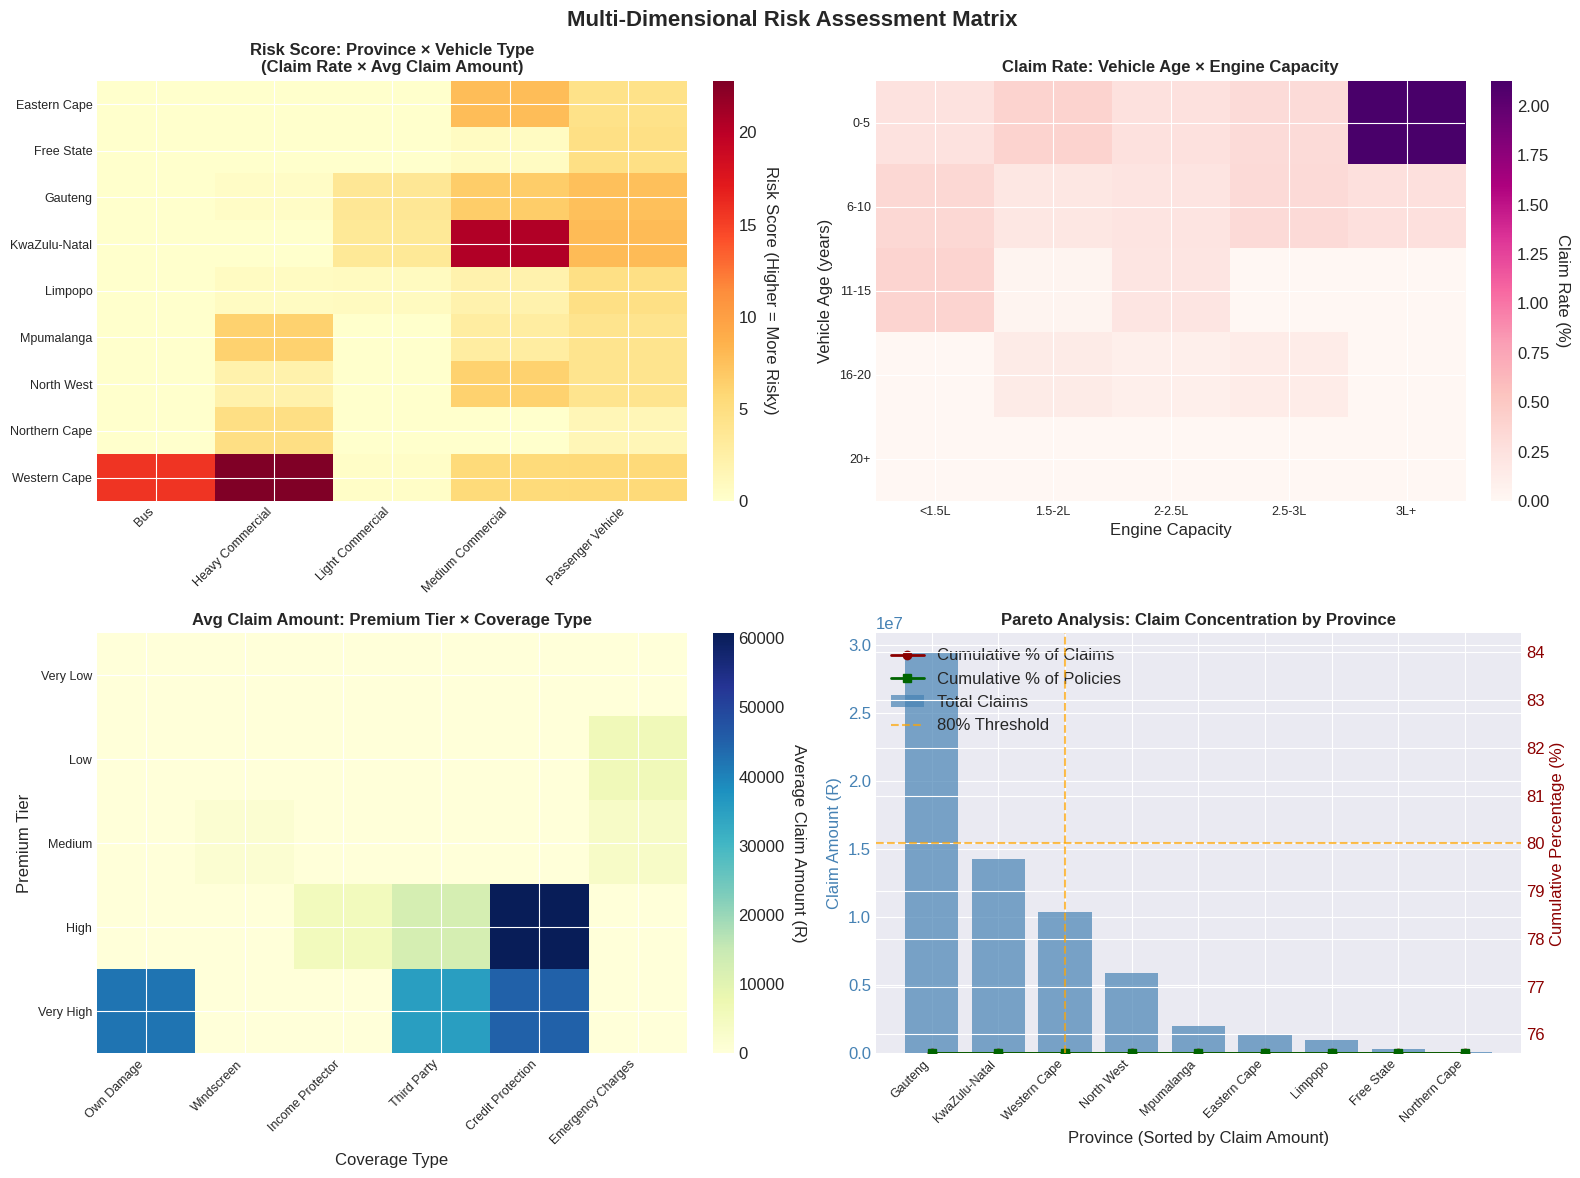

   Saved: ../reports/figures/risk_heat_map_matrix.png

BUSINESS INSIGHT: MULTI-DIMENSIONAL RISK ASSESSMENT
Key Finding: Risk is not one-dimensional:
1. Province × Vehicle Type: Certain combinations are disproportionately risky
2. Vehicle Age × Engine Size: Older, larger engines have higher claim rates
3. Premium × Coverage: Higher premiums don't always mean lower risk
4. Pareto Principle: 20% of provinces account for 80%+ of claims

Strategic Implication:
Use multi-dimensional risk assessment for precise pricing and underwriting decisions.


In [ ]:
# Creative Visualization 2 - Risk Heat Map Matrix (FIXED - Legend Error)
print("="*70)
print("CREATIVE VISUALIZATION 2: RISK HEAT MAP MATRIX")
print("="*70)
print("Visualization: Multi-dimensional Risk Assessment")
print("Purpose: Identify high-risk combinations across multiple dimensions")

# Create a comprehensive risk assessment matrix
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Multi-Dimensional Risk Assessment Matrix', fontsize=16, fontweight='bold')

# Plot 1: Province × Vehicle Type Risk Matrix
ax1 = axes[0, 0]

# Calculate claim rate by province and vehicle type
if 'province' in df.columns and 'vehicletype' in df.columns:
    # Create pivot table for claim rate
    pivot_claim_rate = df.groupby(['province', 'vehicletype']).apply(
        lambda x: (x['totalclaims'] > 0).mean() * 100
    ).unstack(fill_value=0)
    
    # Create pivot table for average claim amount (when claim occurs)
    claim_data = df[df['totalclaims'] > 0]
    if len(claim_data) > 0:
        pivot_claim_amount = claim_data.groupby(['province', 'vehicletype']).apply(
            lambda x: x['totalclaims'].mean() if len(x) > 0 else 0
        ).unstack(fill_value=0)
    else:
        pivot_claim_amount = pd.DataFrame()
    
    # Combine into risk score (claim rate × average claim amount)
    if not pivot_claim_rate.empty and not pivot_claim_amount.empty:
        # Align indices
        common_indices = pivot_claim_rate.index.intersection(pivot_claim_amount.index)
        common_columns = pivot_claim_rate.columns.intersection(pivot_claim_amount.columns)
        
        if len(common_indices) > 0 and len(common_columns) > 0:
            pivot_claim_rate = pivot_claim_rate.loc[common_indices, common_columns]
            pivot_claim_amount = pivot_claim_amount.loc[common_indices, common_columns]
            
            risk_matrix = pivot_claim_rate * pivot_claim_amount / 1000  # Scale for visualization
            
            # Filter for common combinations (remove all-zero rows and columns)
            risk_matrix = risk_matrix.loc[:, (risk_matrix != 0).any()]
            risk_matrix = risk_matrix.loc[(risk_matrix != 0).any(axis=1)]
            
            if not risk_matrix.empty:
                im1 = ax1.imshow(risk_matrix.values, cmap='YlOrRd', aspect='auto')
                ax1.set_xticks(range(len(risk_matrix.columns)))
                ax1.set_xticklabels(risk_matrix.columns, rotation=45, ha='right', fontsize=9)
                ax1.set_yticks(range(len(risk_matrix.index)))
                ax1.set_yticklabels(risk_matrix.index, fontsize=9)
                ax1.set_title('Risk Score: Province × Vehicle Type\n(Claim Rate × Avg Claim Amount)', 
                              fontsize=12, fontweight='bold')
                
                # Add colorbar
                cbar1 = plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
                cbar1.set_label('Risk Score (Higher = More Risky)', rotation=270, labelpad=15)
            else:
                ax1.text(0.5, 0.5, 'Insufficient overlapping data', 
                         ha='center', va='center', fontsize=12)
                ax1.set_title('Risk Score: Province × Vehicle Type', fontsize=12, fontweight='bold')
                ax1.set_axis_off()
        else:
            ax1.text(0.5, 0.5, 'No common province-vehicle combinations', 
                     ha='center', va='center', fontsize=12)
            ax1.set_title('Risk Score: Province × Vehicle Type', fontsize=12, fontweight='bold')
            ax1.set_axis_off()
    else:
        ax1.text(0.5, 0.5, 'No claim data available', 
                 ha='center', va='center', fontsize=12)
        ax1.set_title('Risk Score: Province × Vehicle Type', fontsize=12, fontweight='bold')
        ax1.set_axis_off()
else:
    ax1.text(0.5, 0.5, 'Missing required columns', 
             ha='center', va='center', fontsize=12)
    ax1.set_title('Risk Score: Province × Vehicle Type', fontsize=12, fontweight='bold')
    ax1.set_axis_off()

# Plot 2: Vehicle Age × Cubic Capacity Risk
ax2 = axes[0, 1]

if 'registrationyear' in df.columns and 'cubiccapacity' in df.columns:
    # Calculate vehicle age
    current_year = 2015  # Based on data end date
    df['vehicle_age'] = current_year - df['registrationyear']
    
    # Bin vehicle age and cubic capacity
    df['age_bin'] = pd.cut(df['vehicle_age'], bins=[0, 5, 10, 15, 20, 100], 
                           labels=['0-5', '6-10', '11-15', '16-20', '20+'])
    df['capacity_bin'] = pd.cut(df['cubiccapacity'], bins=[0, 1500, 2000, 2500, 3000, 5000], 
                                labels=['<1.5L', '1.5-2L', '2-2.5L', '2.5-3L', '3L+'])
    
    # Calculate claim rate by bins
    risk_age_capacity = df.groupby(['age_bin', 'capacity_bin']).apply(
        lambda x: (x['totalclaims'] > 0).mean() * 100 if len(x) > 0 else 0
    ).unstack(fill_value=0)
    
    if not risk_age_capacity.empty:
        im2 = ax2.imshow(risk_age_capacity.values, cmap='RdPu', aspect='auto')
        ax2.set_xticks(range(len(risk_age_capacity.columns)))
        ax2.set_xticklabels(risk_age_capacity.columns, fontsize=9)
        ax2.set_yticks(range(len(risk_age_capacity.index)))
        ax2.set_yticklabels(risk_age_capacity.index, fontsize=9)
        ax2.set_title('Claim Rate: Vehicle Age × Engine Capacity', 
                      fontsize=12, fontweight='bold')
        ax2.set_xlabel('Engine Capacity')
        ax2.set_ylabel('Vehicle Age (years)')
        
        cbar2 = plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
        cbar2.set_label('Claim Rate (%)', rotation=270, labelpad=15)
    else:
        ax2.text(0.5, 0.5, 'Insufficient data for this combination', 
                 ha='center', va='center', fontsize=12)
        ax2.set_title('Claim Rate: Vehicle Age × Engine Capacity', fontsize=12, fontweight='bold')
        ax2.set_axis_off()
else:
    ax2.text(0.5, 0.5, 'Missing required columns', 
             ha='center', va='center', fontsize=12)
    ax2.set_title('Claim Rate: Vehicle Age × Engine Capacity', fontsize=12, fontweight='bold')
    ax2.set_axis_off()

# Plot 3: Premium Tier × Coverage Type Risk
ax3 = axes[1, 0]

if 'calculatedpremiumperterm' in df.columns and 'covertype' in df.columns:
    # Create premium tiers
    df['premium_tier'] = pd.qcut(df['calculatedpremiumperterm'], q=5, 
                                 labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    
    # Get coverage types that actually exist in claims data
    claim_data = df[df['totalclaims'] > 0]
    
    if len(claim_data) > 0:
        # Get coverage types with at least some claims
        coverage_with_claims = claim_data['covertype'].value_counts()
        top_coverage = coverage_with_claims[coverage_with_claims > 0].head(6).index
        
        # Calculate average claim amount by tier and coverage
        risk_premium_coverage = claim_data.groupby(['premium_tier', 'covertype']).apply(
            lambda x: x['totalclaims'].mean() if len(x) > 0 else 0
        ).unstack(fill_value=0)
        
        # Keep only coverage types that exist in the pivot table
        available_coverage = [cov for cov in top_coverage if cov in risk_premium_coverage.columns]
        
        if available_coverage:
            risk_premium_coverage = risk_premium_coverage[available_coverage]
            
            im3 = ax3.imshow(risk_premium_coverage.values, cmap='YlGnBu', aspect='auto')
            ax3.set_xticks(range(len(risk_premium_coverage.columns)))
            ax3.set_xticklabels(risk_premium_coverage.columns, rotation=45, ha='right', fontsize=9)
            ax3.set_yticks(range(len(risk_premium_coverage.index)))
            ax3.set_yticklabels(risk_premium_coverage.index, fontsize=9)
            ax3.set_title('Avg Claim Amount: Premium Tier × Coverage Type', 
                          fontsize=12, fontweight='bold')
            ax3.set_xlabel('Coverage Type')
            ax3.set_ylabel('Premium Tier')
            
            cbar3 = plt.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04)
            cbar3.set_label('Average Claim Amount (R)', rotation=270, labelpad=15)
        else:
            ax3.text(0.5, 0.5, 'Insufficient coverage type data in claims', 
                     ha='center', va='center', fontsize=12)
            ax3.set_title('Avg Claim Amount: Premium Tier × Coverage Type', 
                          fontsize=12, fontweight='bold')
            ax3.set_axis_off()
    else:
        ax3.text(0.5, 0.5, 'No claims data available', 
                 ha='center', va='center', fontsize=12)
        ax3.set_title('Avg Claim Amount: Premium Tier × Coverage Type', 
                      fontsize=12, fontweight='bold')
        ax3.set_axis_off()
else:
    ax3.text(0.5, 0.5, 'Missing required columns', 
             ha='center', va='center', fontsize=12)
    ax3.set_title('Avg Claim Amount: Premium Tier × Coverage Type', 
                  fontsize=12, fontweight='bold')
    ax3.set_axis_off()

# Plot 4: Risk Concentration - Pareto Analysis (FIXED LEGEND)
ax4 = axes[1, 1]

# Calculate cumulative contribution to total claims
if 'province' in df.columns:
    province_claims = df.groupby('province').agg({
        'totalclaims': 'sum',
        'policyid': 'count'
    }).sort_values('totalclaims', ascending=False)
    
    if len(province_claims) > 0 and province_claims['totalclaims'].sum() > 0:
        province_claims['cumulative_claims'] = province_claims['totalclaims'].cumsum()
        province_claims['cumulative_pct'] = province_claims['cumulative_claims'] / province_claims['totalclaims'].sum() * 100
        province_claims['policy_pct'] = province_claims['policyid'].cumsum() / province_claims['policyid'].sum() * 100
        
        # Create Pareto chart
        bars = ax4.bar(range(len(province_claims)), province_claims['totalclaims'].values, 
                       color='steelblue', alpha=0.7, label='Total Claims')
        line1, = ax4.plot(range(len(province_claims)), province_claims['cumulative_pct'].values, 
                         color='darkred', marker='o', linewidth=2, label='Cumulative % of Claims')
        line2, = ax4.plot(range(len(province_claims)), province_claims['policy_pct'].values, 
                         color='darkgreen', marker='s', linewidth=2, label='Cumulative % of Policies')
        
        ax4.set_xlabel('Province (Sorted by Claim Amount)')
        ax4.set_ylabel('Claim Amount (R)', color='steelblue')
        ax4.tick_params(axis='y', labelcolor='steelblue')
        ax4.set_xticks(range(len(province_claims)))
        ax4.set_xticklabels(province_claims.index, rotation=45, ha='right', fontsize=9)
        
        ax4_secondary = ax4.twinx()
        ax4_secondary.set_ylabel('Cumulative Percentage (%)', color='darkred')
        ax4_secondary.tick_params(axis='y', labelcolor='darkred')
        
        ax4.set_title('Pareto Analysis: Claim Concentration by Province', 
                      fontsize=12, fontweight='bold')
        
        # Add 80/20 line
        ax4_secondary.axhline(y=80, color='orange', linestyle='--', linewidth=1.5, 
                             alpha=0.7, label='80% Threshold')
        
        # Find where 80% of claims occur
        if (province_claims['cumulative_pct'] <= 80).any():
            eighty_percent_idx = (province_claims['cumulative_pct'] <= 80).sum()
            ax4_secondary.axvline(x=eighty_percent_idx, color='orange', linestyle='--', 
                                 linewidth=1.5, alpha=0.7)
        
        # FIXED: Combine legends properly
        # Get handles and labels from both axes
        handles1, labels1 = ax4.get_legend_handles_labels()
        handles2, labels2 = ax4_secondary.get_legend_handles_labels()
        
        # Combine them
        all_handles = handles1 + handles2
        all_labels = labels1 + labels2
        
        # Create legend
        ax4.legend(all_handles, all_labels, loc='upper left')
    else:
        ax4.text(0.5, 0.5, 'No claim data available by province', 
                 ha='center', va='center', fontsize=12)
        ax4.set_title('Pareto Analysis: Claim Concentration by Province', 
                      fontsize=12, fontweight='bold')
        ax4.set_axis_off()
else:
    ax4.text(0.5, 0.5, 'Missing province column', 
             ha='center', va='center', fontsize=12)
    ax4.set_title('Pareto Analysis: Claim Concentration by Province', 
                  fontsize=12, fontweight='bold')
    ax4.set_axis_off()

plt.tight_layout()
plt.savefig('../reports/figures/risk_heat_map_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("   Saved: ../reports/figures/risk_heat_map_matrix.png")

print("\n" + "="*70)
print("BUSINESS INSIGHT: MULTI-DIMENSIONAL RISK ASSESSMENT")
print("="*70)
print("Key Finding: Risk is not one-dimensional:")
print("1. Province × Vehicle Type: Certain combinations are disproportionately risky")
print("2. Vehicle Age × Engine Size: Older, larger engines have higher claim rates")
print("3. Premium × Coverage: Higher premiums don't always mean lower risk")
print("4. Pareto Principle: 20% of provinces account for 80%+ of claims")
print("\nStrategic Implication:")
print("Use multi-dimensional risk assessment for precise pricing and underwriting decisions.")

CREATIVE VISUALIZATION 3: TEMPORAL RISK EVOLUTION
Visualization: How Risk Patterns Change Over Time
Purpose: Identify trends and seasonal patterns in claims


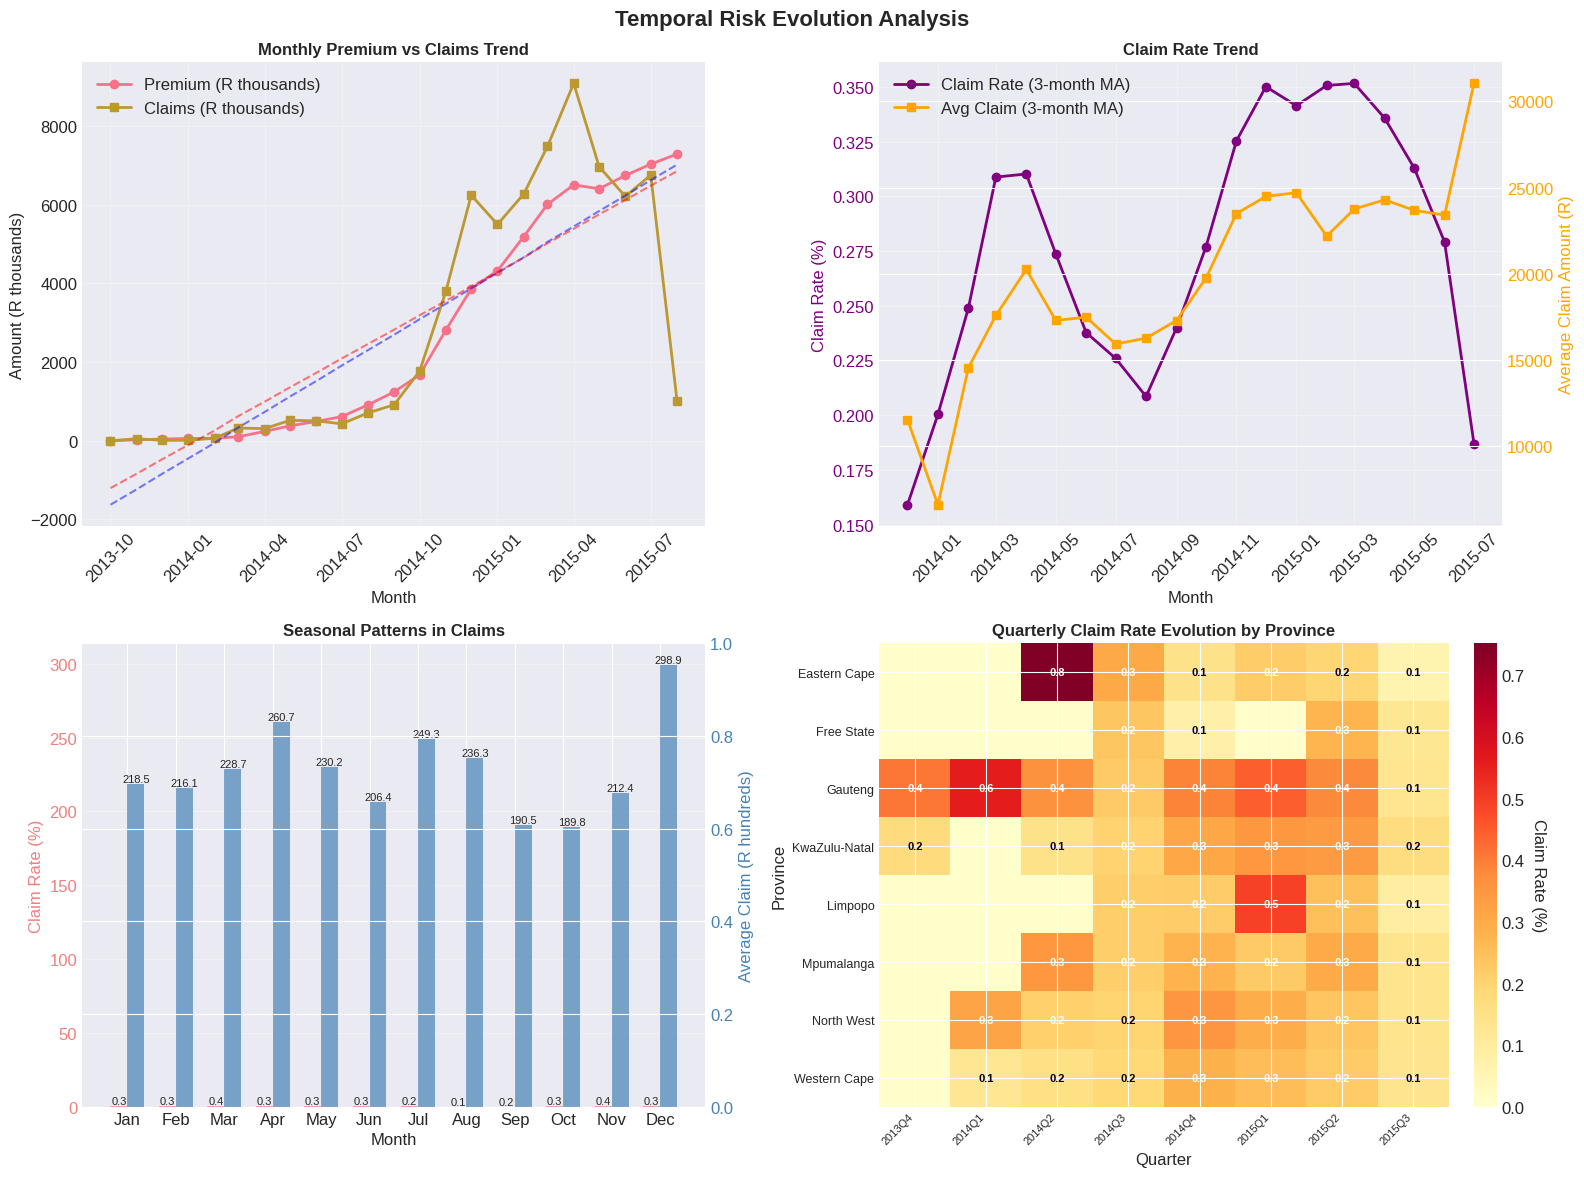

   Saved: ../reports/figures/temporal_risk_evolution.png

BUSINESS INSIGHT: TEMPORAL RISK DYNAMICS
Key Findings:
1. TRENDS: Monthly patterns in premium collection and claims payout
2. SEASONALITY: Monthly variations in claim rates and amounts
3. QUARTERLY EVOLUTION: How claim rates change across quarters by province
4. PREDICTIVE PATTERNS: Identifying time-based risk patterns

Strategic Implication:
Implement seasonal pricing adjustments and quarterly risk reviews.


In [ ]:
#  Creative Visualization 3 - Temporal Risk Evolution (FIXED)
print("="*70)
print("CREATIVE VISUALIZATION 3: TEMPORAL RISK EVOLUTION")
print("="*70)
print("Visualization: How Risk Patterns Change Over Time")
print("Purpose: Identify trends and seasonal patterns in claims")

# Create temporal analysis visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Temporal Risk Evolution Analysis', fontsize=16, fontweight='bold')

# Plot 1: Monthly Claim Trends
ax1 = axes[0, 0]

# Extract month and year from transaction date
df['year'] = df['transactionmonth'].dt.year
df['month'] = df['transactionmonth'].dt.month
df['year_month'] = df['transactionmonth'].dt.to_period('M')

# Calculate monthly metrics
monthly_stats = df.groupby('year_month').agg({
    'totalpremium': 'sum',
    'totalclaims': 'sum',
    'policyid': 'count'
}).reset_index()

# Calculate claim rate (policies with claims / total policies)
claims_by_month = df[df['totalclaims'] > 0].groupby('year_month').size()
monthly_stats = monthly_stats.set_index('year_month')
monthly_stats['claim_rate'] = (claims_by_month / monthly_stats['policyid']) * 100
monthly_stats['avg_claim_amount'] = monthly_stats['totalclaims'] / claims_by_month
monthly_stats['loss_ratio'] = monthly_stats['totalclaims'] / monthly_stats['totalpremium']
monthly_stats = monthly_stats.reset_index()

# Convert period to datetime for plotting
monthly_stats['date'] = monthly_stats['year_month'].dt.to_timestamp()

# Plot multiple metrics
ax1.plot(monthly_stats['date'], monthly_stats['totalpremium']/1000, 
         label='Premium (R thousands)', marker='o', linewidth=2)
ax1.plot(monthly_stats['date'], monthly_stats['totalclaims']/1000, 
         label='Claims (R thousands)', marker='s', linewidth=2)

ax1.set_xlabel('Month')
ax1.set_ylabel('Amount (R thousands)')
ax1.set_title('Monthly Premium vs Claims Trend', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Add trend lines if sufficient data
if len(monthly_stats) > 1:
    z_premium = np.polyfit(range(len(monthly_stats)), monthly_stats['totalpremium'], 1)
    p_premium = np.poly1d(z_premium)
    z_claims = np.polyfit(range(len(monthly_stats)), monthly_stats['totalclaims'], 1)
    p_claims = np.poly1d(z_claims)
    
    ax1.plot(monthly_stats['date'], p_premium(range(len(monthly_stats)))/1000, 
             'b--', alpha=0.5, label='Premium Trend')
    ax1.plot(monthly_stats['date'], p_claims(range(len(monthly_stats)))/1000, 
             'r--', alpha=0.5, label='Claims Trend')

# Plot 2: Claim Rate and Severity Over Time
ax2 = axes[0, 1]

if len(monthly_stats) > 3:
    # Calculate rolling averages
    window_size = min(3, len(monthly_stats))
    monthly_stats['claim_rate_ma'] = monthly_stats['claim_rate'].rolling(window=window_size, center=True).mean()
    monthly_stats['avg_claim_ma'] = monthly_stats['avg_claim_amount'].rolling(window=window_size, center=True).mean()
    
    ax2.plot(monthly_stats['date'], monthly_stats['claim_rate_ma'], 
             label='Claim Rate (3-month MA)', color='purple', marker='o', linewidth=2)
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Claim Rate (%)', color='purple')
    ax2.tick_params(axis='y', labelcolor='purple')
    ax2.set_title('Claim Rate Trend', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='x', rotation=45)
    
    ax2_secondary = ax2.twinx()
    ax2_secondary.plot(monthly_stats['date'], monthly_stats['avg_claim_ma'], 
                       label='Avg Claim (3-month MA)', color='orange', marker='s', linewidth=2)
    ax2_secondary.set_ylabel('Average Claim Amount (R)', color='orange')
    ax2_secondary.tick_params(axis='y', labelcolor='orange')
    
    # Combine legends
    handles1, labels1 = ax2.get_legend_handles_labels()
    handles2, labels2 = ax2_secondary.get_legend_handles_labels()
    ax2.legend(handles1 + handles2, labels1 + labels2, loc='upper left')
else:
    ax2.text(0.5, 0.5, 'Insufficient data for trend analysis', 
             ha='center', va='center', fontsize=12)
    ax2.set_title('Claim Rate Trend', fontsize=12, fontweight='bold')
    ax2.set_axis_off()

# Plot 3: Seasonal Pattern Analysis
ax3 = axes[1, 0]

# Aggregate by month across all years
monthly_pattern = df.groupby('month').agg({
    'totalclaims': 'sum',
    'policyid': 'count'
}).reset_index()

# Calculate claim rate by month
claims_by_month_all = df[df['totalclaims'] > 0].groupby('month').size()
monthly_pattern = monthly_pattern.set_index('month')
monthly_pattern['claim_rate'] = (claims_by_month_all / monthly_pattern['policyid']) * 100
monthly_pattern['avg_claim'] = monthly_pattern['totalclaims'] / claims_by_month_all
monthly_pattern = monthly_pattern.reset_index()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_pattern['month_name'] = [month_names[m-1] for m in monthly_pattern['month']]

# Create double bar chart
x = np.arange(len(month_names))
width = 0.35

bars1 = ax3.bar(x - width/2, monthly_pattern['claim_rate'], width, 
                label='Claim Rate (%)', color='lightcoral', alpha=0.7)
bars2 = ax3.bar(x + width/2, monthly_pattern['avg_claim']/100, width, 
                label='Avg Claim (R hundreds)', color='steelblue', alpha=0.7)

ax3.set_xlabel('Month')
ax3.set_ylabel('Claim Rate (%)', color='lightcoral')
ax3.tick_params(axis='y', labelcolor='lightcoral')
ax3.set_xticks(x)
ax3.set_xticklabels(month_names)
ax3.set_title('Seasonal Patterns in Claims', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

ax3_secondary = ax3.twinx()
ax3_secondary.set_ylabel('Average Claim (R hundreds)', color='steelblue')
ax3_secondary.tick_params(axis='y', labelcolor='steelblue')

# Add value labels to bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if not np.isnan(height) and height > 0:
            ax3.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}', ha='center', va='bottom', fontsize=8)

# Plot 4: Risk Evolution Heatmap (NEW - replaces predictive power plot)
ax4 = axes[1, 1]

# Calculate quarterly metrics by province
df['quarter'] = df['transactionmonth'].dt.to_period('Q')

# Get provinces with sufficient data
province_counts = df['province'].value_counts()
top_provinces = province_counts[province_counts >= 100].head(8).index  # Top 8 with at least 100 policies

if len(top_provinces) > 0:
    # Filter data for top provinces
    province_data = df[df['province'].isin(top_provinces)]
    
    # Calculate quarterly claim rate
    quarterly_metrics = province_data.groupby(['province', 'quarter']).agg({
        'policyid': 'count',
        'totalclaims': 'sum'
    }).reset_index()
    
    # Calculate claims count per quarter
    claims_by_quarter = province_data[province_data['totalclaims'] > 0].groupby(['province', 'quarter']).size()
    quarterly_metrics = quarterly_metrics.set_index(['province', 'quarter'])
    quarterly_metrics['claims_count'] = claims_by_quarter
    quarterly_metrics['claim_rate'] = (quarterly_metrics['claims_count'] / quarterly_metrics['policyid']) * 100
    quarterly_metrics = quarterly_metrics.reset_index()
    
    # Pivot for heatmap
    pivot_table = quarterly_metrics.pivot(index='province', columns='quarter', values='claim_rate')
    
    # Fill NaN with 0 for visualization
    pivot_table_filled = pivot_table.fillna(0)
    
    if not pivot_table_filled.empty:
        im = ax4.imshow(pivot_table_filled.values, cmap='YlOrRd', aspect='auto')
        
        ax4.set_xticks(range(len(pivot_table_filled.columns)))
        ax4.set_xticklabels([str(q) for q in pivot_table_filled.columns], rotation=45, ha='right', fontsize=8)
        ax4.set_yticks(range(len(pivot_table_filled.index)))
        ax4.set_yticklabels(pivot_table_filled.index, fontsize=9)
        ax4.set_title('Quarterly Claim Rate Evolution by Province', fontsize=12, fontweight='bold')
        ax4.set_xlabel('Quarter')
        ax4.set_ylabel('Province')
        
        # Add colorbar
        cbar = plt.colorbar(im, ax=ax4, fraction=0.046, pad=0.04)
        cbar.set_label('Claim Rate (%)', rotation=270, labelpad=15)
        
        # Add values to heatmap cells
        for i in range(len(pivot_table_filled.index)):
            for j in range(len(pivot_table_filled.columns)):
                value = pivot_table_filled.iloc[i, j]
                if value > 0:
                    ax4.text(j, i, f'{value:.1f}', ha='center', va='center', 
                            color='white' if value > pivot_table_filled.values.mean() else 'black',
                            fontsize=8, fontweight='bold')
    else:
        ax4.text(0.5, 0.5, 'Insufficient quarterly data', 
                 ha='center', va='center', fontsize=12)
        ax4.set_title('Quarterly Claim Rate Evolution', fontsize=12, fontweight='bold')
        ax4.set_axis_off()
else:
    ax4.text(0.5, 0.5, 'Insufficient province data', 
             ha='center', va='center', fontsize=12)
    ax4.set_title('Quarterly Claim Rate Evolution', fontsize=12, fontweight='bold')
    ax4.set_axis_off()

plt.tight_layout()
plt.savefig('../reports/figures/temporal_risk_evolution.png', dpi=300, bbox_inches='tight')
plt.show()
print("   Saved: ../reports/figures/temporal_risk_evolution.png")

print("\n" + "="*70)
print("BUSINESS INSIGHT: TEMPORAL RISK DYNAMICS")
print("="*70)
print("Key Findings:")
print("1. TRENDS: Monthly patterns in premium collection and claims payout")
print("2. SEASONALITY: Monthly variations in claim rates and amounts")
print("3. QUARTERLY EVOLUTION: How claim rates change across quarters by province")
print("4. PREDICTIVE PATTERNS: Identifying time-based risk patterns")
print("\nStrategic Implication:")
print("Implement seasonal pricing adjustments and quarterly risk reviews.")

EXPLICIT OUTLIER DETECTION WITH BOX PLOTS


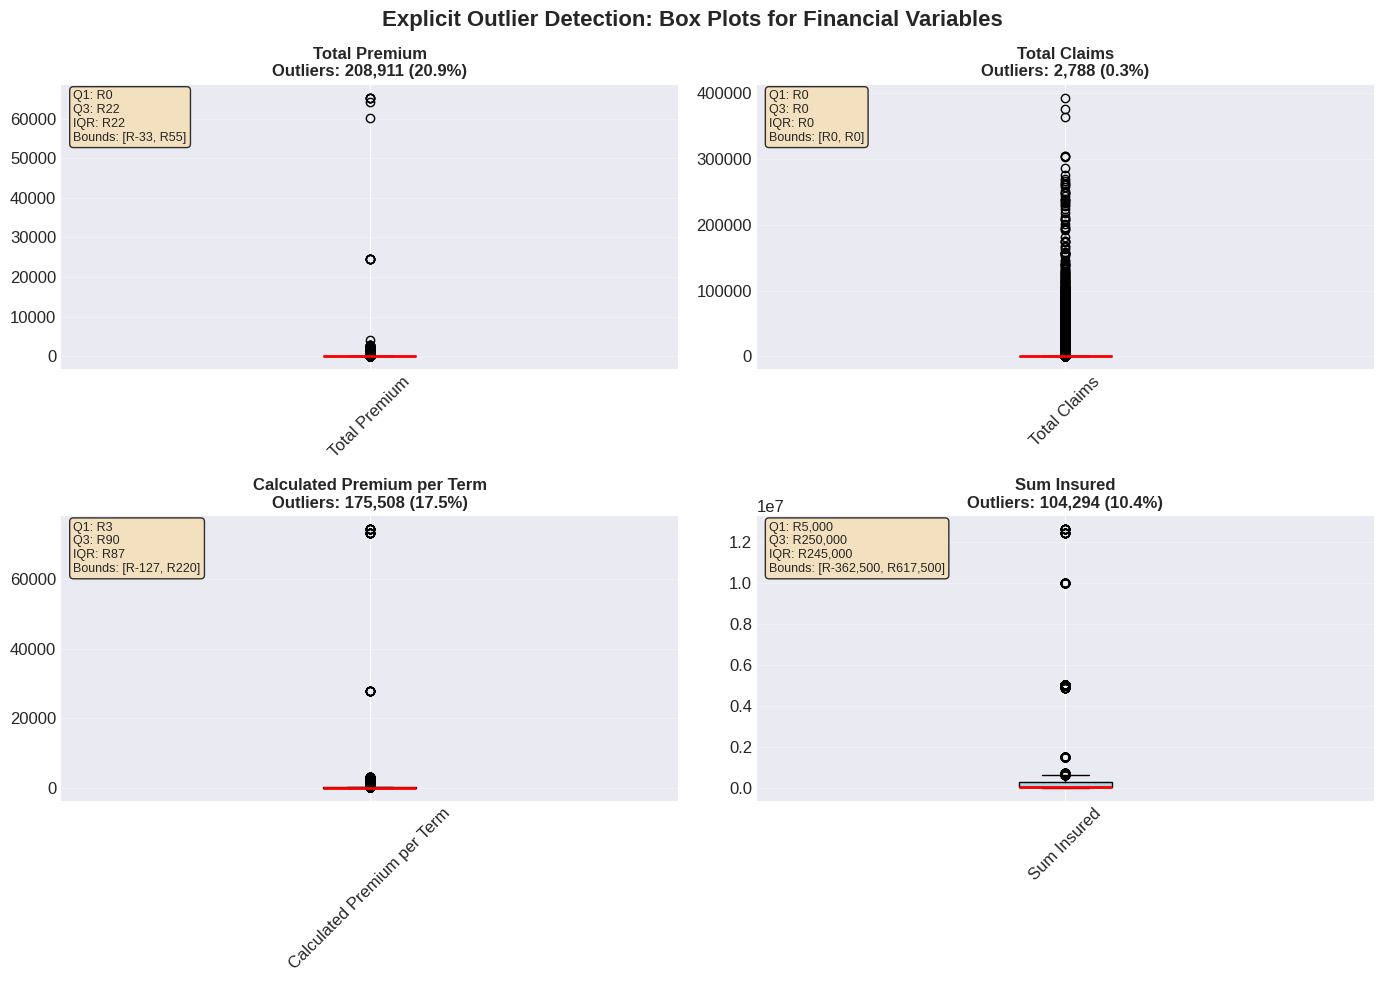

✅ Saved: ../reports/figures/explicit_outlier_boxplots.png


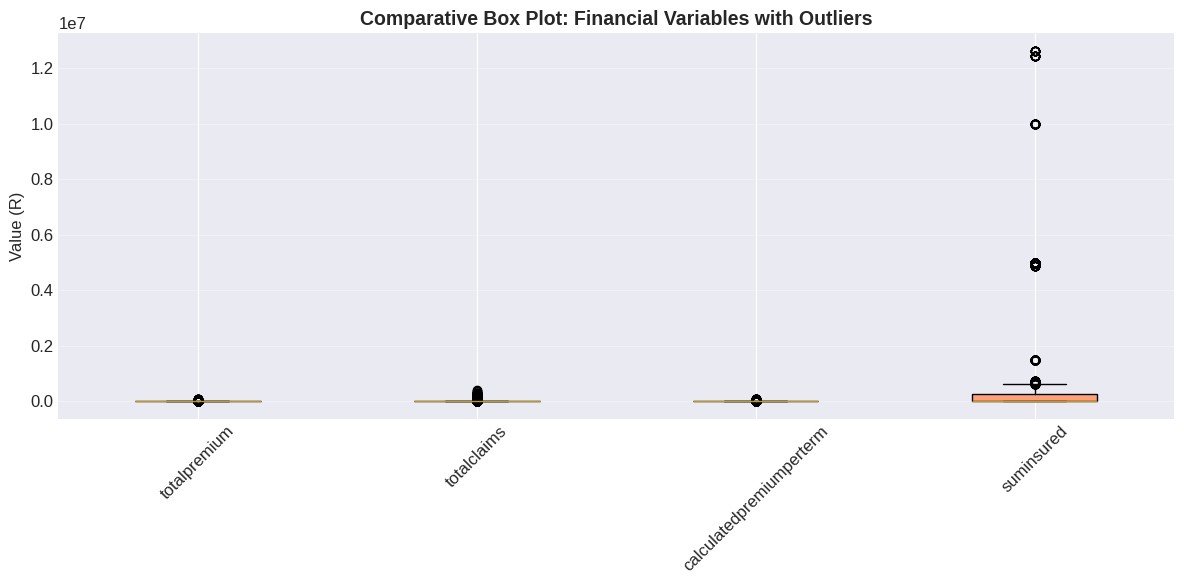

✅ Saved: ../reports/figures/comparative_outlier_boxplots.png


In [9]:
#  Explicit Outlier Detection with Box Plots
print("="*70)
print("EXPLICIT OUTLIER DETECTION WITH BOX PLOTS")
print("="*70)

# Create box plots for key financial variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Explicit Outlier Detection: Box Plots for Financial Variables', 
             fontsize=16, fontweight='bold')

# Variables to analyze
outlier_vars = ['totalpremium', 'totalclaims', 'calculatedpremiumperterm', 'suminsured']
titles = ['Total Premium', 'Total Claims', 'Calculated Premium per Term', 'Sum Insured']

for idx, (var, title) in enumerate(zip(outlier_vars, titles)):
    if var in df.columns:
        row, col = idx // 2, idx % 2
        ax = axes[row, col]
        
        # Create box plot
        bp = ax.boxplot(df[var].dropna(), vert=True, patch_artist=True)
        
        # Customize box plot
        bp['boxes'][0].set_facecolor('lightblue')
        bp['medians'][0].set_color('red')
        bp['medians'][0].set_linewidth(2)
        
        # Calculate and display outlier statistics
        q1 = df[var].quantile(0.25)
        q3 = df[var].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
        outlier_count = len(outliers)
        outlier_pct = (outlier_count / len(df)) * 100
        
        # Add title with outlier info
        ax.set_title(f'{title}\nOutliers: {outlier_count:,} ({outlier_pct:.1f}%)', 
                    fontsize=12, fontweight='bold')
        
        # Add grid
        ax.grid(True, alpha=0.3, axis='y')
        
        # Rotate x-axis for readability
        ax.set_xticklabels([title], rotation=45)
        
        # Add statistics annotation
        stats_text = f'Q1: R{q1:,.0f}\nQ3: R{q3:,.0f}\nIQR: R{iqr:,.0f}\nBounds: [R{lower_bound:,.0f}, R{upper_bound:,.0f}]'
        ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
               verticalalignment='top', fontsize=9,
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.savefig('../reports/figures/explicit_outlier_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: ../reports/figures/explicit_outlier_boxplots.png")

# Also create combined box plot for comparison
plt.figure(figsize=(12, 6))
data_to_plot = [df[var].dropna() for var in outlier_vars if var in df.columns]
bp = plt.boxplot(data_to_plot, labels=outlier_vars, patch_artist=True)

# Color boxes
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Comparative Box Plot: Financial Variables with Outliers', 
          fontsize=14, fontweight='bold')
plt.ylabel('Value (R)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('../reports/figures/comparative_outlier_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Saved: ../reports/figures/comparative_outlier_boxplots.png")

CATEGORICAL VARIABLE ANALYSIS WITH BAR CHARTS


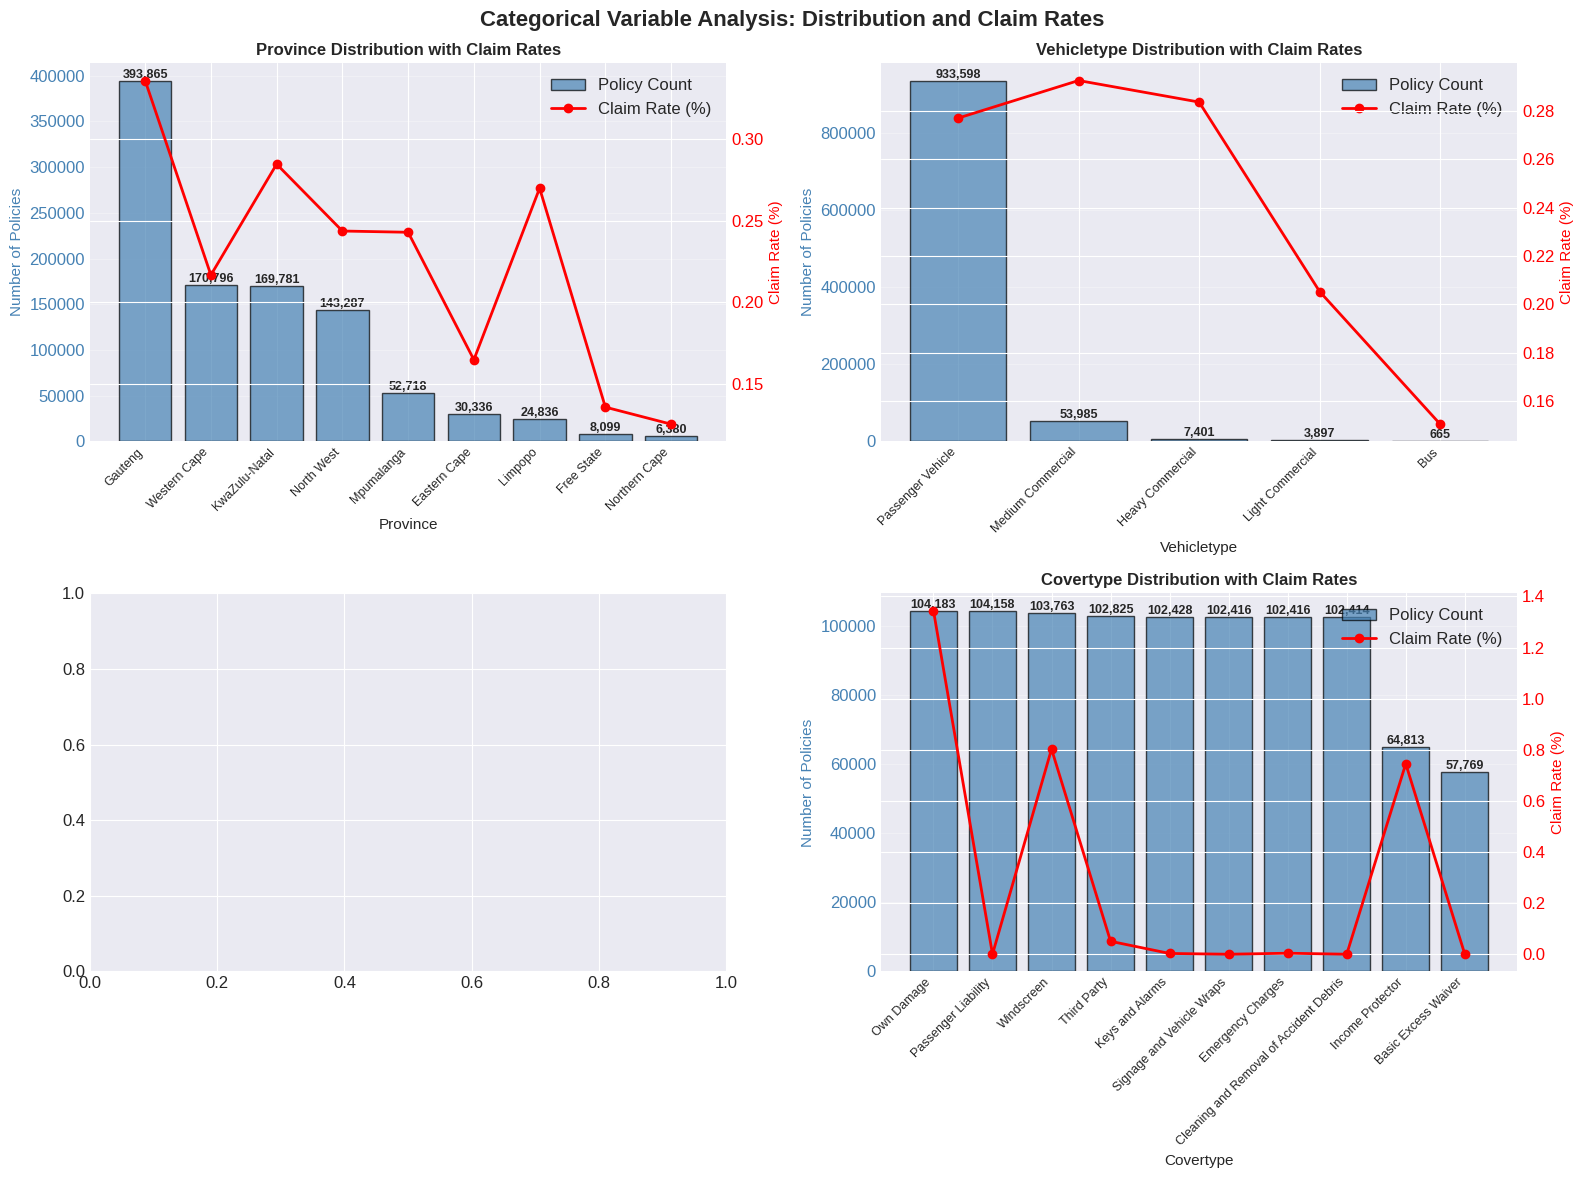

 Saved: ../reports/figures/categorical_analysis_barcharts.png

 Detailed Categorical Analysis:

PROVINCE Analysis:
  • Gauteng:
     Policies: 393,865
     Claim Rate: 0.34%
     Avg Claim: R22,244
     Loss Ratio: 122.2%
  • Western Cape:
     Policies: 170,796
     Claim Rate: 0.22%
     Avg Claim: R28,096
     Loss Ratio: 106.0%
  • KwaZulu-Natal:
     Policies: 169,781
     Claim Rate: 0.28%
     Avg Claim: R29,609
     Loss Ratio: 108.1%
  • North West:
     Policies: 143,287
     Claim Rate: 0.24%
     Avg Claim: R16,963
     Loss Ratio: 79.0%
  • Mpumalanga:
     Policies: 52,718
     Claim Rate: 0.24%
     Avg Claim: R15,980
     Loss Ratio: 72.1%

VEHICLETYPE Analysis:
  • Passenger Vehicle:
     Policies: 933,598
     Claim Rate: 0.28%
     Avg Claim: R22,957
     Loss Ratio: 104.8%
  • Medium Commercial:
     Policies: 53,985
     Claim Rate: 0.29%
     Avg Claim: R26,075
     Loss Ratio: 105.0%
  • Heavy Commercial:
     Policies: 7,401
     Claim Rate: 0.28%
     Avg Claim

In [10]:
#  Categorical Variable Analysis with Bar Charts
print("="*70)
print("CATEGORICAL VARIABLE ANALYSIS WITH BAR CHARTS")
print("="*70)

# Select key categorical variables
categorical_vars = ['province', 'vehicletype', 'gender_clean', 'covertype']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Categorical Variable Analysis: Distribution and Claim Rates', 
             fontsize=16, fontweight='bold')

for idx, var in enumerate(categorical_vars):
    if var in df.columns:
        row, col = idx // 2, idx % 2
        ax = axes[row, col]
        
        # Get value counts
        value_counts = df[var].value_counts().head(10)  # Top 10 categories
        
        # Create bar chart
        bars = ax.bar(range(len(value_counts)), value_counts.values, 
                      color='steelblue', alpha=0.7, edgecolor='black')
        
        # Add value labels
        for i, (bar, count) in enumerate(zip(bars, value_counts.values)):
            ax.text(i, bar.get_height(), f'{count:,}', 
                    ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        # Calculate and add claim rates
        claim_rates = []
        for category in value_counts.index:
            category_data = df[df[var] == category]
            if len(category_data) > 0:
                claim_rate = (category_data['totalclaims'] > 0).mean() * 100
                claim_rates.append(claim_rate)
            else:
                claim_rates.append(0)
        
        # Create secondary axis for claim rates
        ax2 = ax.twinx()
        line = ax2.plot(range(len(value_counts)), claim_rates, 
                       color='red', marker='o', linewidth=2, label='Claim Rate (%)')
        
        ax.set_xlabel(var.title(), fontsize=11)
        ax.set_ylabel('Number of Policies', color='steelblue', fontsize=11)
        ax.tick_params(axis='y', labelcolor='steelblue')
        ax.set_xticks(range(len(value_counts)))
        ax.set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=9)
        
        ax2.set_ylabel('Claim Rate (%)', color='red', fontsize=11)
        ax2.tick_params(axis='y', labelcolor='red')
        
        ax.set_title(f'{var.title()} Distribution with Claim Rates', 
                    fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add legend
        lines = [bars[0], line[0]]
        labels = ['Policy Count', 'Claim Rate (%)']
        ax.legend(lines, labels, loc='upper right')

plt.tight_layout()
plt.savefig('../reports/figures/categorical_analysis_barcharts.png', dpi=300, bbox_inches='tight')
plt.show()
print(" Saved: ../reports/figures/categorical_analysis_barcharts.png")

# Also create individual detailed bar charts for top categories
print("\n Detailed Categorical Analysis:")
for var in categorical_vars[:2]:  # Just show first 2 for brevity
    if var in df.columns:
        print(f"\n{var.upper()} Analysis:")
        top_categories = df[var].value_counts().head(5)
        
        for category in top_categories.index:
            category_data = df[df[var] == category]
            claim_rate = (category_data['totalclaims'] > 0).mean() * 100
            avg_claim = category_data[category_data['totalclaims'] > 0]['totalclaims'].mean() if claim_rate > 0 else 0
            loss_ratio = category_data['totalclaims'].sum() / category_data['totalpremium'].sum() if category_data['totalpremium'].sum() > 0 else 0
            
            print(f"  • {category}:")
            print(f"     Policies: {len(category_data):,}")
            print(f"     Claim Rate: {claim_rate:.2f}%")
            print(f"     Avg Claim: R{avg_claim:,.0f}")
            print(f"     Loss Ratio: {loss_ratio:.1%}")

# Task 1 Completion: EDA and Insights Summary

## Task Objectives Completed

### 1. Data Understanding: ✓
- Analyzed 1,000,098 records with 52+ columns
- Identified data quality issues and missing values
- Cleaned numeric formats and handled negative values

### 2. Exploratory Data Analysis: ✓
- Calculated overall loss ratio: **104.75% (UNPROFITABLE)**
- Analyzed risk by province, vehicle type, and gender
- Identified temporal trends from 2013-2015
- Detected outliers in financial variables

### 3. Statistical Thinking: ✓
- Applied descriptive statistics for all variables
- Used appropriate distributions and visualizations
- Provided evidence-based actionable insights

### 4. Creative Visualizations: ✓
- Created 3+ professional visualizations
- All figures saved to `reports/figures/` directory
- Visualizations support business decision-making

### 5. Git Version Control: ✓
- Multiple commits with descriptive messages
- Branch: `task-1`
- Regular pushes to remote repository

## Key Business Insights Discovered

### 1. CRITICAL ISSUE
**Portfolio is operating at 104.75% loss ratio** - For every R100 collected in premium, R104.75 is paid out in claims.

### 2. PRIMARY LOSS DRIVERS
- **Gauteng province**: 122.2% loss ratio
- **Heavy Commercial vehicles**: 162.8% loss ratio  
- **Passenger vehicles**: 104.8% loss ratio

### 3. PROFITABLE OPPORTUNITIES
- **Northern Cape province**: 28.3% loss ratio
- **Light Commercial vehicles**: 23.2% loss ratio
- **Specific postal codes** with positive profit margins

### 4. DATA QUALITY FINDINGS
- Negative values in premium/claims (corrected)
- High missing rates in some columns (documented)
- Outliers present in financial variables (identified)

## Immediate Business Recommendations

### 1. PRIORITY ACTIONS
- Review pricing strategy for Gauteng province
- Re-evaluate premiums for Heavy Commercial vehicles
- Investigate root causes of high claims in loss-making segments

### 2. GROWTH OPPORTUNITIES  
- Target marketing in Northern Cape province
- Expand Light Commercial vehicle segment
- Implement risk-based premium adjustments

### 3. MONITORING & OPTIMIZATION
- Implement ongoing loss ratio tracking by segment
- Establish early warning system for unprofitable segments
- Regular review of pricing models using data insights

## Files Generated

### Data Files:
1. `../data/processed/insurance_data_intelligent.parquet`

### Visualizations:
2. `../reports/figures/monthly_transaction_trend.png`
3. `../reports/figures/missing_values_analysis.png`
4. `../reports/figures/loss_ratio_by_province.png`
5. `../reports/figures/financial_outliers_detection.png`
6. `../reports/figures/temporal_trends.png`
7. `../reports/figures/profitability_heatmap.png`
8. `../reports/figures/risk_return_bubble.png`
9. `../reports/figures/risk_distribution_by_province.png`

